<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Project 7 - Unsupervised Learning: Trade & Ahead</center></h1>
<h1><center>Jorge Ramon Vazquez Campero</center></h1>

---

---


<p align="center">
  <img src="Designer.png" alt="Description of Image" width="700"/>
</p>

---

---


**Table of contents**<a id='toc0_'></a>    
- [Problem Statement](#toc1_1_)    
    - [Business Context](#toc1_1_1_)    
    - [Objective](#toc1_1_2_)    
    - [Data Dictionary](#toc1_1_3_)    
  - [Initial Setup](#toc1_2_)    
    - [Importing necessary libraries and data](#toc1_2_1_)    
    - [Loading the dataset](#toc1_2_2_)    
  - [Data Overview & Sanity Checks](#toc1_3_)    
  - [Exploratory Data Analysis (EDA)](#toc1_4_)    
    - [Functions Necessary for EDA](#toc1_4_1_)    
    - [Univariate Analysis](#toc1_4_2_)    
      - [Categorical Variables](#toc1_4_2_1_)    
      - [Numerical Variables](#toc1_4_2_2_)    
    - [Multivariate Analysis](#toc1_4_3_)    
      - [Heatmap](#toc1_4_3_1_)    
    - [What does the distribution of stock prices look like?](#toc1_4_4_)    
    - [The stocks of which economic sector have seen the maximum price increase on average?](#toc1_4_5_)    
    - [How are the different variables correlated with each other?](#toc1_4_6_)    
    - [Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?](#toc1_4_7_)    
    - [P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?](#toc1_4_8_)    
  - [Data Preprocessing](#toc1_5_)    
    - [Duplicate Value Check](#toc1_5_1_)    
    - [Missing Value Treatment](#toc1_5_2_)    
    - [Outlier Check](#toc1_5_3_)    
    - [Feature Engineering](#toc1_5_4_)    
  - [EDA](#toc1_6_)    
  - [K-means Clustering](#toc1_7_)    
    - [Euclidean Distance](#toc1_7_1_)    
    - [Silhouette Scores](#toc1_7_2_)    
    - [Manhattan Distance](#toc1_7_3_)    
    - [Silhouette Scores](#toc1_7_4_)    
    - [Cluster Profiling](#toc1_7_5_)    
  - [Hierarchical Clustering](#toc1_8_)    
    - [Checking Cophenetic Correlation](#toc1_8_1_)    
    - [Linkage Methods with Euclidean Distance](#toc1_8_2_)    
    - [Visualizing Dendrograms](#toc1_8_3_)    
    - [Creating Model using Sklearn](#toc1_8_4_)    
    - [Cluster Profiling](#toc1_9_)    
  - [K-means vs Hierarchical Clustering](#toc1_10_)    
    - [Execution time](#toc1_10_1_)    
    - [Number of Distinct Clusters](#toc1_10_2_)    
    - [Number of Similar Observations between K-means and Hierarchical Clustering](#toc1_10_3_)    
    - [Most Optimal Number of Clusters](#toc1_10_4_)    
  - [Actionable Insights and Recommendations](#toc1_11_)    
    - [Identifying Low-Risk, Stable Stocks (Cluster 0):](#toc1_11_1_)    
    - [High-Volatility, High-Risk Stocks (Cluster 2):](#toc1_11_2_)    
    - [Growth Stocks with Positive Financial Momentum (Cluster 4):](#toc1_11_3_)    
    - [High Liquidity, Mid-Volatility Stocks (Cluster 1):](#toc1_11_4_)    
    - [Small, Volatile Companies (Cluster 3):](#toc1_11_5_)    
    - [Recommendations for Portfolio Diversification:](#toc1_11_6_)    
    - [Final Business Recommendations:](#toc1_11_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Problem Statement](#toc0_)


### <a id='toc1_1_1_'></a>[Business Context](#toc0_)

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

### <a id='toc1_1_2_'></a>[Objective](#toc0_)

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### <a id='toc1_1_3_'></a>[Data Dictionary](#toc0_)

- `Ticker Symbol`: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- `Company`: Name of the company
- `GICS Sector`: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- `GICS Sub Industry`: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- `Current Price`: Current stock price in dollars
- `Price Change`: Percentage change in the stock price in 13 weeks
- `Volatility`: Standard deviation of the stock price over the past 13 weeks
- `ROE`: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- `Cash Ratio`: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
- `Net Cash Flow`: The difference between a company's cash inflows and outflows (in dollars)
- `Net Income`: Revenues minus expenses, interest, and taxes (in dollars)
- `Earnings Per Share`: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- `Estimated Shares Outstanding`: Company's stock currently held by all its shareholders
- `P/E Ratio`: Ratio of the company's current stock price to the earnings per share
- ` P/B Ratio`: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)


## <a id='toc1_2_'></a>[Initial Setup](#toc0_)


### <a id='toc1_2_1_'></a>[Importing necessary libraries and data](#toc0_)


In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
!pip install --upgrade -q jinja2


**Note**: _After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again._


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis

# Libraries to help with data visualization
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For enhanced visualizations with built-in themes and color palettes
import plotly.express as px  # For interactive visualizations

# Setting visualization and data display options
sns.set()  # Set default Seaborn theme for plots
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Display float values up to three decimal places
pd.set_option("display.max_columns", None)  # Remove column limit for displaying data
pd.set_option("display.max_rows", 200)  # Set limit for displaying rows

# Suppress warnings during code execution
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for matplotlib in Jupyter notebooks
%matplotlib inline


# EDA Libraries
# Libraries for statistical distributions and hypothesis testing
import scipy.stats as stats  # For statistical tests and distributions
# Visualization libraries for EDA
import seaborn as sns  # For creating histograms, countplots, etc.
import matplotlib.pyplot as plt  # For custom visualizations

# Data Preprocessing Libraries
# Libraries for handling missing values and scaling data
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,)  # For scaling numerical features
from sklearn.impute import SimpleImputer  # For imputing missing values

# Feature Engineering Libraries
# Libraries for feature transformations
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical variables
from sklearn.decomposition import PCA  # For dimensionality reduction

# Libraries for clustering algorithms
from sklearn.cluster import (
    KMeans,
    AgglomerativeClustering,
)  # For K-Means and Hierarchical Clustering
from scipy.cluster.hierarchy import (
    dendrogram,
    linkage,
    cophenet,
)  # For creating dendrograms

# Libraries for dimensionality reduction
from sklearn.decomposition import PCA  # For Principal Component Analysis (PCA)

# to compute distances
from scipy.spatial.distance import pdist


### <a id='toc1_2_2_'></a>[Loading the dataset](#toc0_)


In [3]:
# Load the dataset
data = pd.read_csv("stock_data.csv")

# Copying data to another variable to avoid any changes to original data
df_insights = data.copy()


## <a id='toc1_3_'></a>[Data Overview & Sanity Checks](#toc0_)

- Observations
- Sanity checks


In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df_insights.head())

# Display the last few rows of the dataset
print("Last few rows of the dataset:")
display(df_insights.tail())


First few rows of the dataset:


Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines         42.350        10.000       1.687  135   
1        Pharmaceuticals         59.240         8.339       2.198  130   
2  Health Care Equipment         44.910        11.301       1.274   21   
3   Application Software         93.940        13.977       1.358    9   
4         Semiconductors         55.320        -1.828       1.701   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000              11.390   
1          77       51000000  5144000000               3.150   
2          67      938000000  4423000000               2.940   
3         180     -240840000   629551000               1.260   
4         272      315120000   696878000               0.310   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                 668129938.500      3.718     -8.784  
1                1633015873.000     18.806     -8.750  
2                1504421769.000     15.276     -0.394  
3                 499643650.800     74.556      4.200  
4                2247993548.000    178.452      1.060

Last few rows of the dataset:


Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services         33.260        14.888       1.845   
336                   Restaurants         52.516        -8.699       1.479   
337         Health Care Equipment        102.590         9.348       1.404   
338                Regional Banks         27.300        -1.159       1.468   
339               Pharmaceuticals         47.920        16.679       1.610   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000              -4.640   
336  142          27      159000000  1293000000               2.970   
337    1         100      376000000   147000000               0.780   
338    4          99      -43623000   309471000               1.200   
339   32          65      272000000   339000000               0.680   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335                 939457327.600     28.976      6.262  
336                 435353535.400     17.682     -3.838  
337                 188461538.500    131.526    -23.884  
338                 257892500.000     22.750     -0.063  
339                 498529411.800     70.471      1.723

In [5]:
# Dropping an ID column
# Renaming the 'Security' column to 'Company'
df_insights.rename(columns={"Security": "Company"}, inplace=True)


In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df_insights.head())

# Display the last few rows of the dataset
print("Last few rows of the dataset:")
display(df_insights.tail())


First few rows of the dataset:


Ticker Symbol                  Company             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines         42.350        10.000       1.687  135   
1        Pharmaceuticals         59.240         8.339       2.198  130   
2  Health Care Equipment         44.910        11.301       1.274   21   
3   Application Software         93.940        13.977       1.358    9   
4         Semiconductors         55.320        -1.828       1.701   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000              11.390   
1          77       51000000  5144000000               3.150   
2          67      938000000  4423000000               2.940   
3         180     -240840000   629551000               1.260   
4         272      315120000   696878000               0.310   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                 668129938.500      3.718     -8.784  
1                1633015873.000     18.806     -8.750  
2                1504421769.000     15.276     -0.394  
3                 499643650.800     74.556      4.200  
4                2247993548.000    178.452      1.060

Last few rows of the dataset:


Ticker Symbol                 Company             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services         33.260        14.888       1.845   
336                   Restaurants         52.516        -8.699       1.479   
337         Health Care Equipment        102.590         9.348       1.404   
338                Regional Banks         27.300        -1.159       1.468   
339               Pharmaceuticals         47.920        16.679       1.610   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000              -4.640   
336  142          27      159000000  1293000000               2.970   
337    1         100      376000000   147000000               0.780   
338    4          99      -43623000   309471000               1.200   
339   32          65      272000000   339000000               0.680   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
335                 939457327.600     28.976      6.262  
336                 435353535.400     17.682     -3.838  
337                 188461538.500    131.526    -23.884  
338                 257892500.000     22.750     -0.063  
339                 498529411.800     70.471      1.723

**Observations**:

- There will be some dimensionality reduction that we can perform.
- There are some companies with diverse cashflow and Net Income varying from negative numbers to positive numbers.
- There seems to be an error in the data set as the second column should be called "Company" and instead it is called "Security"


In [7]:
# Display the shape of the dataset
df_insights.shape
print("There are", df_insights.shape[0], "rows and", df_insights.shape[1], "columns.\n")
# Display the data types of the columns in the dataset
df_insights.info()


There are 340 rows and 15 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Company                       340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding

**Observations**:

- Fortunately, there does not seem to be any missing values in the dataset.
- Most of the columns are numerical in nature.
- Some columns `GICS Sector` and `GICS SubIndustry` may need to be dropped.


In [8]:
# Display the statistical summary for Categorical variables in the dataset
print("Display the statistical summary for Categorical variables in the dataset:")
display(df_insights.describe(include=["object", "category"]).T)


# Display the statistical summary for Numerical variables in the dataset
print("Display the statistical summary for Numerical variables in the dataset:")
display(df_insights.describe(include=["int64", "float64", "complex"]).T)


Display the statistical summary for Categorical variables in the dataset:


count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Company             340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

Display the statistical summary for Numerical variables in the dataset:


count           mean            std  \
Current Price                340.000         80.862         98.055   
Price Change                 340.000          4.078         12.006   
Volatility                   340.000          1.526          0.592   
ROE                          340.000         39.597         96.548   
Cash Ratio                   340.000         70.024         90.421   
Net Cash Flow                340.000   55537620.588 1946365312.176   
Net Income                   340.000 1494384602.941 3940150279.328   
Earnings Per Share           340.000          2.777          6.588   
Estimated Shares Outstanding 340.000  577028337.754  845849595.418   
P/E Ratio                    340.000         32.613         44.349   
P/B Ratio                    340.000         -1.718         13.967   

                                          min            25%           50%  \
Current Price                           4.500         38.555        59.705   
Price Change                          -47.130         -0.939         4.820   
Volatility                              0.733          1.135         1.386   
ROE                                     1.000          9.750        15.000   
Cash Ratio                              0.000         18.000        47.000   
Net Cash Flow                -11208000000.000 -193906500.000   2098000.000   
Net Income                   -23528000000.000  352301250.000 707336000.000   
Earnings Per Share                    -61.200          1.558         2.895   
Estimated Shares Outstanding     27672156.860  158848216.100 309675137.800   
P/E Ratio                               2.935         15.045        20.820   
P/B Ratio                             -76.119         -4.352        -1.067   

                                        75%             max  
Current Price                        92.880        1274.950  
Price Change                         10.695          55.052  
Volatility                            1.696           4.580  
ROE                                  27.000         917.000  
Cash Ratio                           99.000         958.000  
Net Cash Flow                 169810750.000 20764000000.000  
Net Income                   1899000000.000 24442000000.000  
Earnings Per Share                    4.620          50.090  
Estimated Shares Outstanding  573117457.325  6159292035.000  
P/E Ratio                            31.765         528.039  
P/B Ratio                             3.917         129.065

**Observations**:

- The data seems pretty standard.
- There are some companies with diverse cashflow and Net Income varying from negative numbers to positive numbers.
- There are 11 unique `GICS Sector` and 11 unique `GICS SubIndustry` in the dataset.


In [9]:
# Making a list of all categorical variables ()'object' or 'category')
cat_cols = df_insights.select_dtypes(include=["object", "category"]).columns

# Iterate through each categorical column and print the count of unique categorical levels, followed by a separator line.
for column in cat_cols:
    print(df_insights[column].value_counts())
    print("-" * 50)


Ticker Symbol
AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: count, Length: 340, dtype: int64
--------------------------------------------------
Company
American Airlines Group    1
NextEra Energy             1
Nucor Corp.                1
Northern Trust Corp.       1
Norfolk Southern Corp.     1
                          ..
Equity Residential         1
Equinix                    1
EOG Resources              1
Eastman Chemical           1
Zoetis                     1
Name: count, Length: 340, dtype: int64
--------------------------------------------------
GICS Sector
Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunication

**Observations**:

- The top three GICS Sector values are: `Industrials`, `Financials`, and `Health Care` tied with `Consumer Discretionary`.
- The top three GICS SubIndustry values are: `Oil & Gas Exploration & Production`, `REITs`, tied with `Industrial Conglomerates`, and `Electric Utilities` tied with `Internet Software & Services`.


In [ ]:
# Making a list of all numerical variables ('int64', 'float64', 'complex')
num_cols = df_insights.select_dtypes(include=["int64", "float64", "complex"]).columns

# Iterate through each numerical column and print summary statistics, followed by a separator line.
for column in num_cols:
    print(df_insights[column].describe())
    print("-" * 50)


count    340.000
mean      80.862
std       98.055
min        4.500
25%       38.555
50%       59.705
75%       92.880
max     1274.950
Name: Current Price, dtype: float64
--------------------------------------------------
count   340.000
mean      4.078
std      12.006
min     -47.130
25%      -0.939
50%       4.820
75%      10.695
max      55.052
Name: Price Change, dtype: float64
--------------------------------------------------
count   340.000
mean      1.526
std       0.592
min       0.733
25%       1.135
50%       1.386
75%       1.696
max       4.580
Name: Volatility, dtype: float64
--------------------------------------------------
count   340.000
mean     39.597
std      96.548
min       1.000
25%       9.750
50%      15.000
75%      27.000
max     917.000
Name: ROE, dtype: float64
--------------------------------------------------
count   340.000
mean     70.024
std      90.421
min       0.000
25%      18.000
50%      47.000
75%      99.000
max     958.000
Name: Cash Ratio, 

In [11]:
# Checking missing values across each column
missing_values = df_insights.isnull().sum()
print("The number of missing values on each column of the data set is:")
missing_values


The number of missing values on each column of the data set is:


Ticker Symbol                   0
Company                         0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations**:

- As stated before, there are no missing values in the dataset.


In [12]:
# Check for complete duplicate records
duplicate_records = df_insights.duplicated().sum()
print("The number of duplicate values on the data set is:", duplicate_records)


The number of duplicate values on the data set is: 0


**Observations**:

- No duplicate Values in the dataset.


In [13]:
# Check for duplicates in individual columns
for column in df_insights:
    print(f"Duplicates in {column}: {df_insights[column].duplicated().sum()}")
    print("-" * 50)


Duplicates in Ticker Symbol: 0
--------------------------------------------------
Duplicates in Company: 0
--------------------------------------------------
Duplicates in GICS Sector: 329
--------------------------------------------------
Duplicates in GICS Sub Industry: 236
--------------------------------------------------
Duplicates in Current Price: 4
--------------------------------------------------
Duplicates in Price Change: 0
--------------------------------------------------
Duplicates in Volatility: 0
--------------------------------------------------
Duplicates in ROE: 258
--------------------------------------------------
Duplicates in Cash Ratio: 216
--------------------------------------------------
Duplicates in Net Cash Flow: 8
--------------------------------------------------
Duplicates in Net Income: 5
--------------------------------------------------
Duplicates in Earnings Per Share: 72
--------------------------------------------------
Duplicates in Estimated Sh

**Observations**:

- It is normal to have duplicate in individual columns as there can be companies with same values for some columns.


## <a id='toc1_4_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?


### <a id='toc1_4_1_'></a>[Functions Necessary for EDA](#toc0_)


In [14]:
# Function to plot labeled barplots for categorical variables in Univariate analysis
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot


In [15]:
# Function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined with a title

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Add a title to the figure
    f2.suptitle(f"Distribution of {feature}", fontsize=16)

    # Boxplot creation
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box2,
        showmeans=True,
        palette="viridis",
    )

    # Histogram creation
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist2,
        bins=bins if bins else 50,
    )

    # Add mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )

    # Add a legend for the mean and median lines
    ax_hist2.legend()

    plt.show()  # Show the plot


In [16]:
# Function to plot stacked barplots for categorical variables in Univariate analysis
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


In [17]:
# Copying data to another variable to avoid any changes to original data
df_eda = df_insights.copy()


### <a id='toc1_4_2_'></a>[Univariate Analysis](#toc0_)


#### <a id='toc1_4_2_1_'></a>[Categorical Variables](#toc0_)


Distribution of ' Ticker Symbol '
count     340
unique    340
top       AAL
freq        1
Name: Ticker Symbol, dtype: object


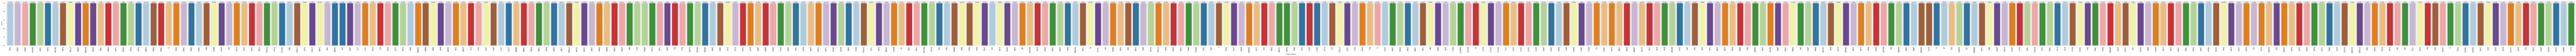

----------------------------------------------------------------------------------------------------
Distribution of ' Company '
count                         340
unique                        340
top       American Airlines Group
freq                            1
Name: Company, dtype: object


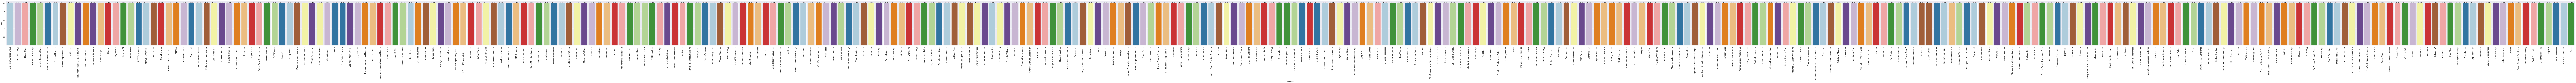

----------------------------------------------------------------------------------------------------
Distribution of ' GICS Sector '
count             340
unique             11
top       Industrials
freq               53
Name: GICS Sector, dtype: object


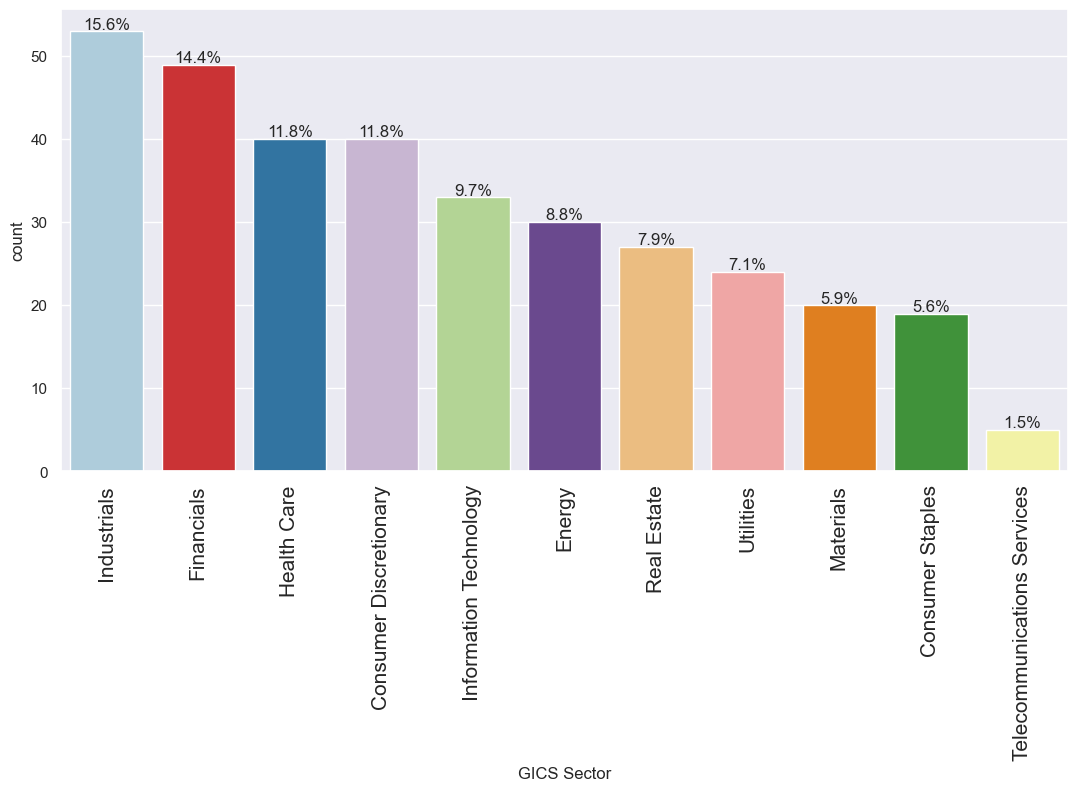

----------------------------------------------------------------------------------------------------
Distribution of ' GICS Sub Industry '
count                                    340
unique                                   104
top       Oil & Gas Exploration & Production
freq                                      16
Name: GICS Sub Industry, dtype: object


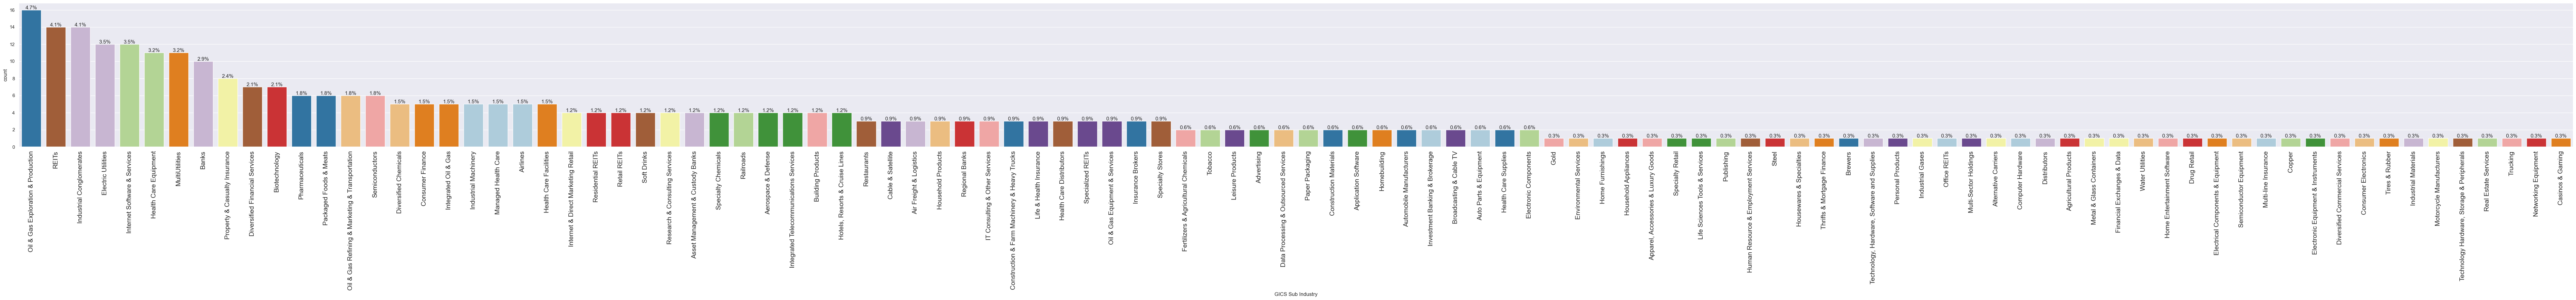

----------------------------------------------------------------------------------------------------


In [18]:
# Making a list of all categorical variables ('object' or 'category')
cat_cols = df_eda.select_dtypes(include=["object", "category"]).columns

# Columns to exclude
exclude_cols = ["Ticker Symbol", "Company"]

# Iterate through each categorical column and plot the distribution
for column in cat_cols:
    # if column not in exclude_cols:
    print("Distribution of '", column, "'")
    print(df_eda[column].describe())
    labeled_barplot(df_eda, column, perc=True)
    print("-" * 100)


#### <a id='toc1_4_2_2_'></a>[Numerical Variables](#toc0_)


Distribution of 'Current Price'
count    340.000
mean      80.862
std       98.055
min        4.500
25%       38.555
50%       59.705
75%       92.880
max     1274.950
Name: Current Price, dtype: float64


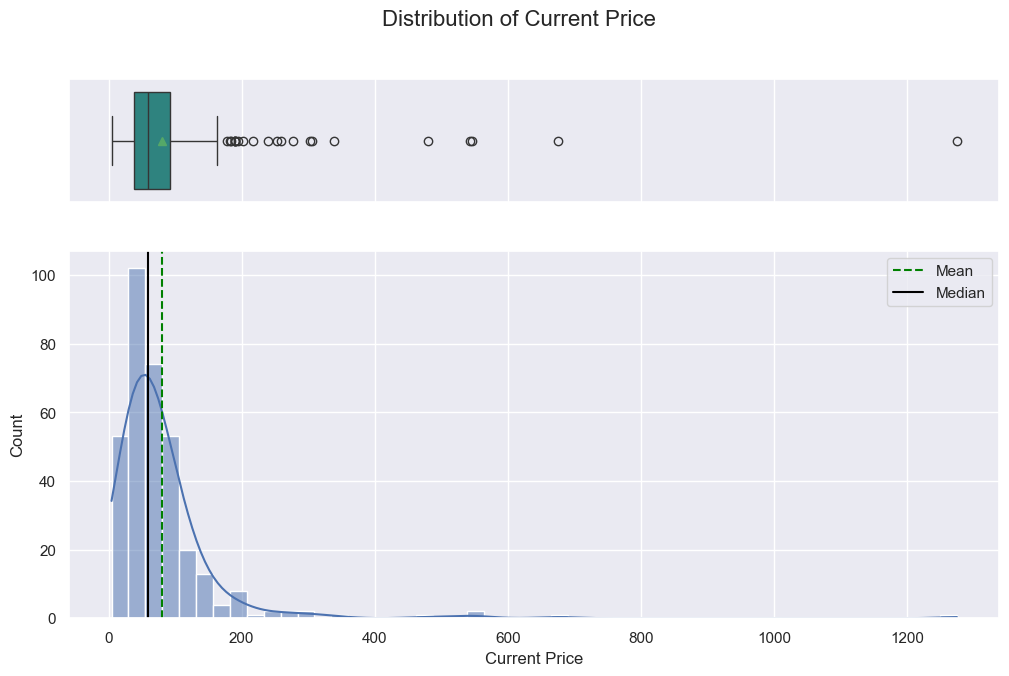

----------------------------------------------------------------------------------------------------
Distribution of 'Price Change'
count   340.000
mean      4.078
std      12.006
min     -47.130
25%      -0.939
50%       4.820
75%      10.695
max      55.052
Name: Price Change, dtype: float64


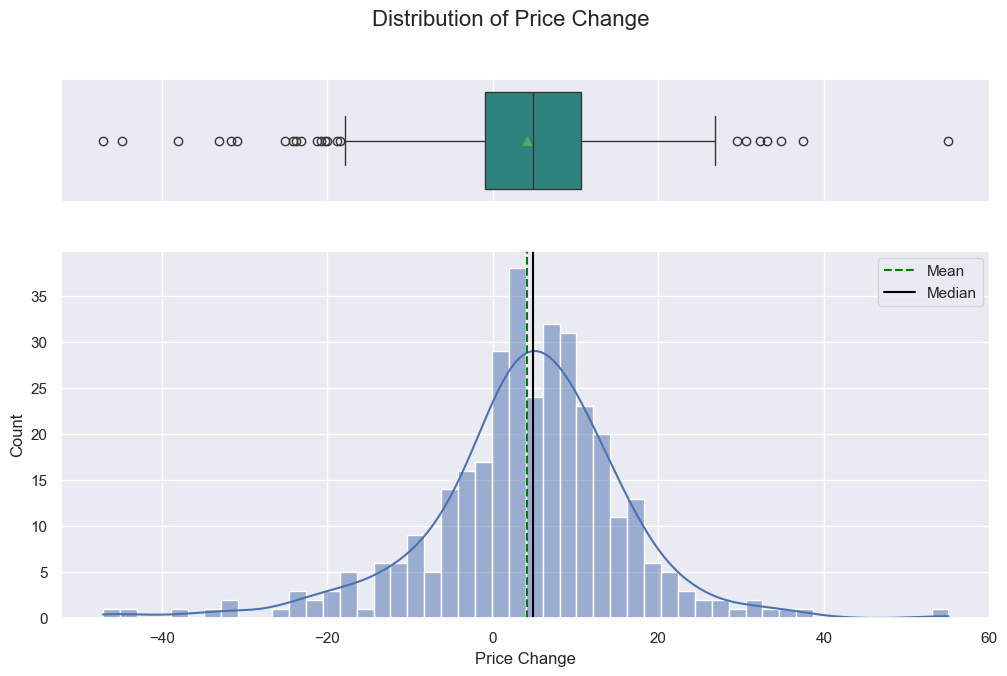

----------------------------------------------------------------------------------------------------
Distribution of 'Volatility'
count   340.000
mean      1.526
std       0.592
min       0.733
25%       1.135
50%       1.386
75%       1.696
max       4.580
Name: Volatility, dtype: float64


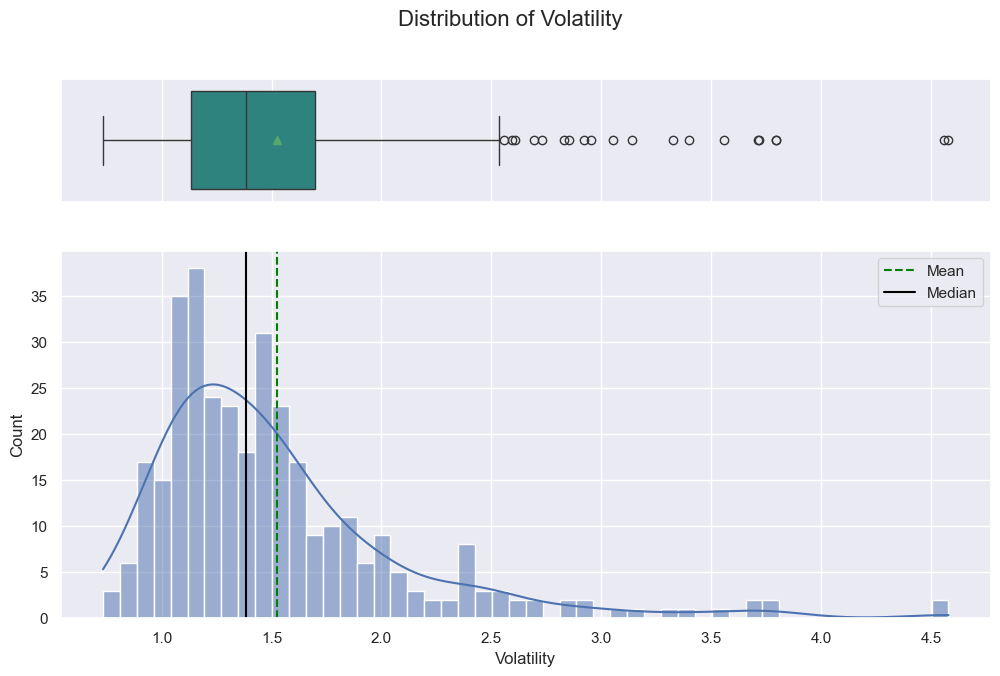

----------------------------------------------------------------------------------------------------
Distribution of 'ROE'
count   340.000
mean     39.597
std      96.548
min       1.000
25%       9.750
50%      15.000
75%      27.000
max     917.000
Name: ROE, dtype: float64


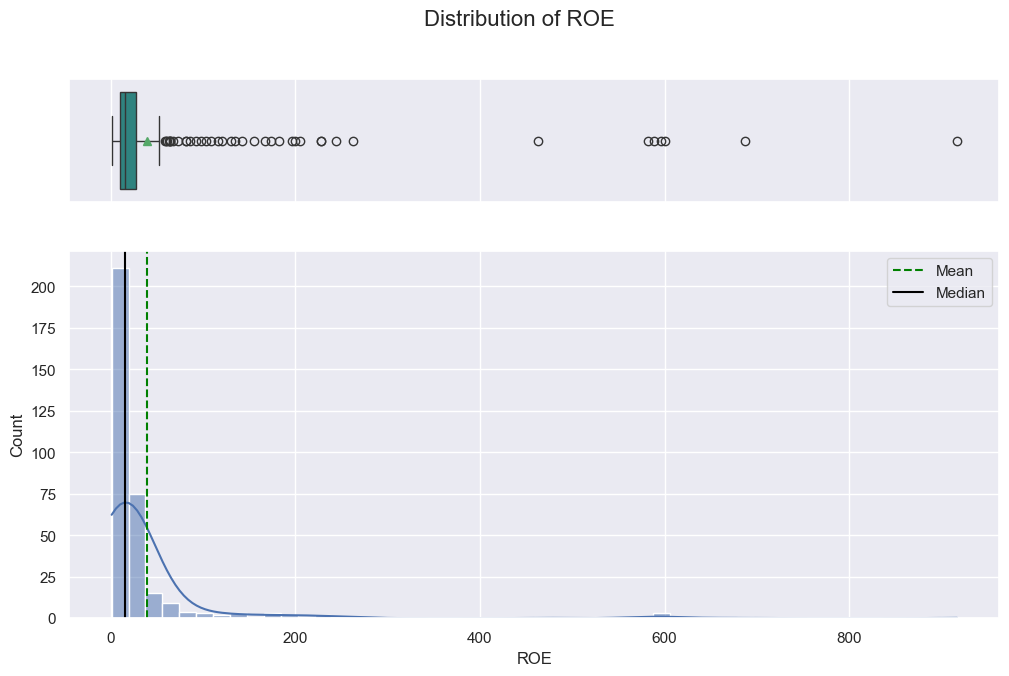

----------------------------------------------------------------------------------------------------
Distribution of 'Cash Ratio'
count   340.000
mean     70.024
std      90.421
min       0.000
25%      18.000
50%      47.000
75%      99.000
max     958.000
Name: Cash Ratio, dtype: float64


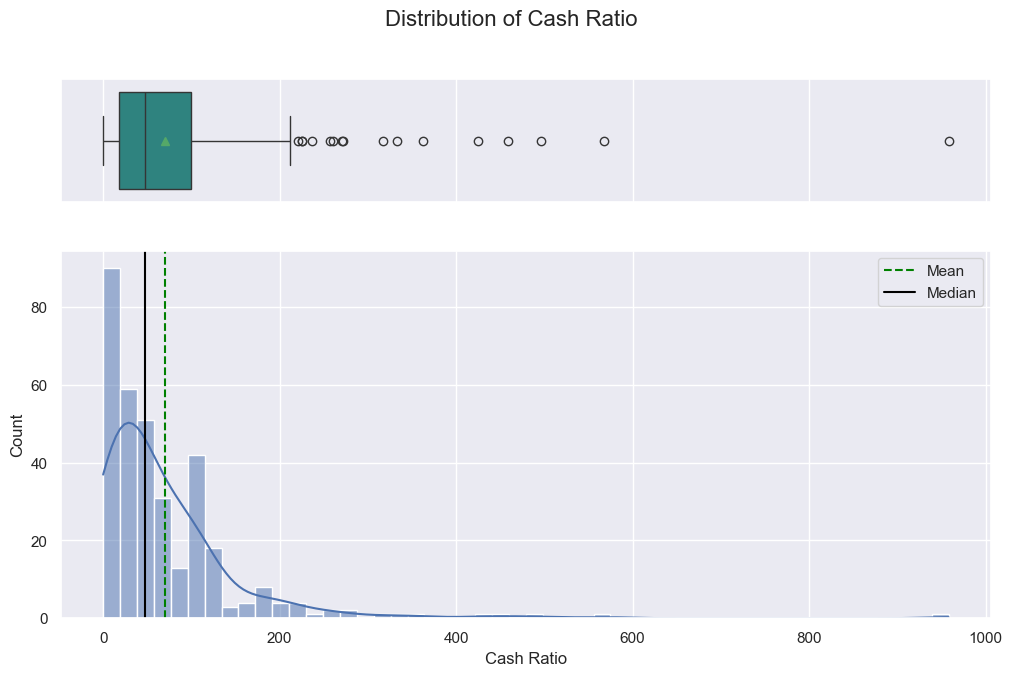

----------------------------------------------------------------------------------------------------
Distribution of 'Net Cash Flow'
count            340.000
mean        55537620.588
std       1946365312.176
min     -11208000000.000
25%       -193906500.000
50%          2098000.000
75%        169810750.000
max      20764000000.000
Name: Net Cash Flow, dtype: float64


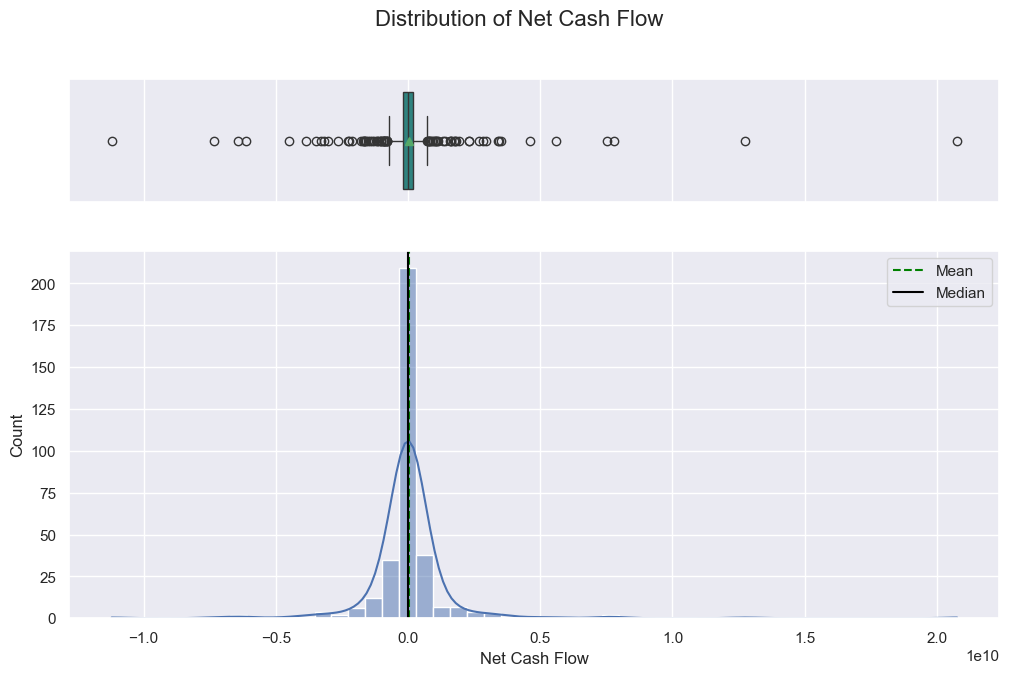

----------------------------------------------------------------------------------------------------
Distribution of 'Net Income'
count            340.000
mean      1494384602.941
std       3940150279.328
min     -23528000000.000
25%        352301250.000
50%        707336000.000
75%       1899000000.000
max      24442000000.000
Name: Net Income, dtype: float64


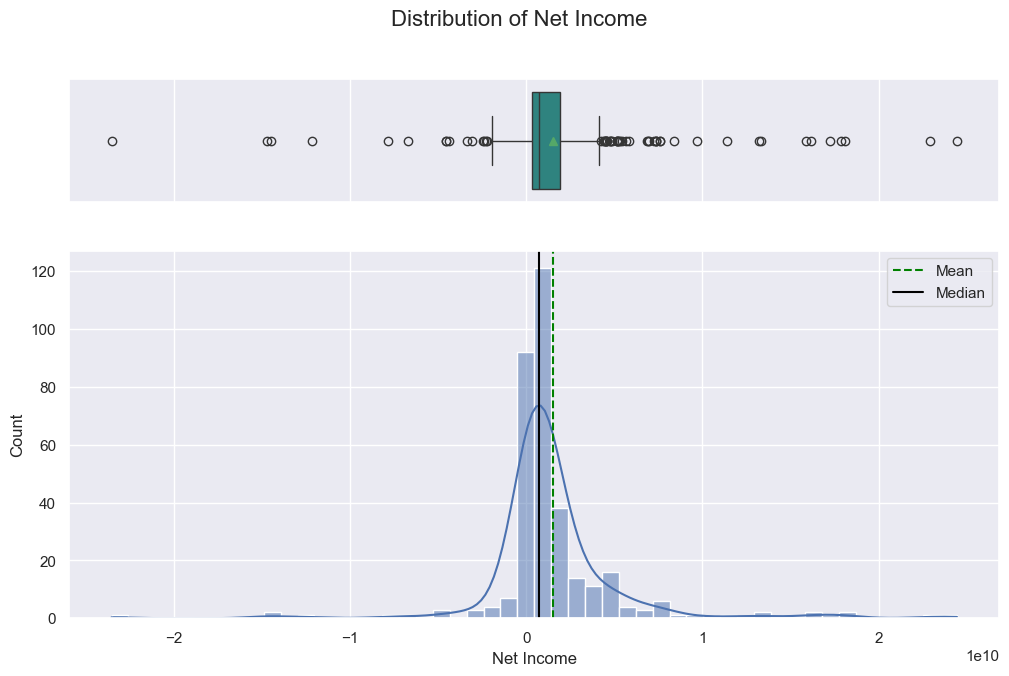

----------------------------------------------------------------------------------------------------
Distribution of 'Earnings Per Share'
count   340.000
mean      2.777
std       6.588
min     -61.200
25%       1.558
50%       2.895
75%       4.620
max      50.090
Name: Earnings Per Share, dtype: float64


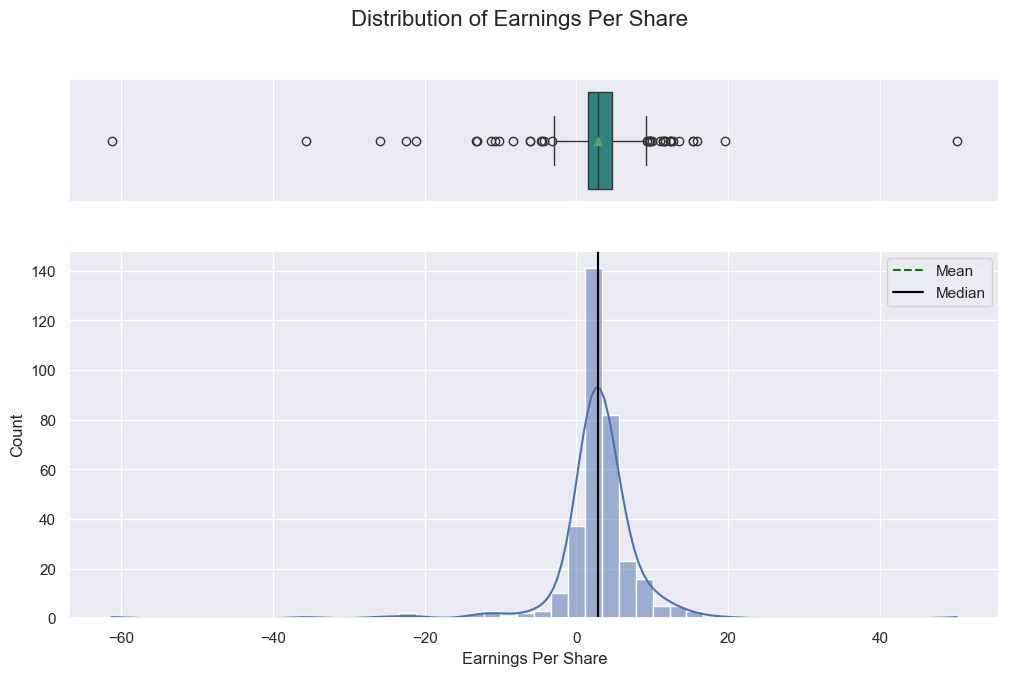

----------------------------------------------------------------------------------------------------
Distribution of 'Estimated Shares Outstanding'
count          340.000
mean     577028337.754
std      845849595.418
min       27672156.860
25%      158848216.100
50%      309675137.800
75%      573117457.325
max     6159292035.000
Name: Estimated Shares Outstanding, dtype: float64


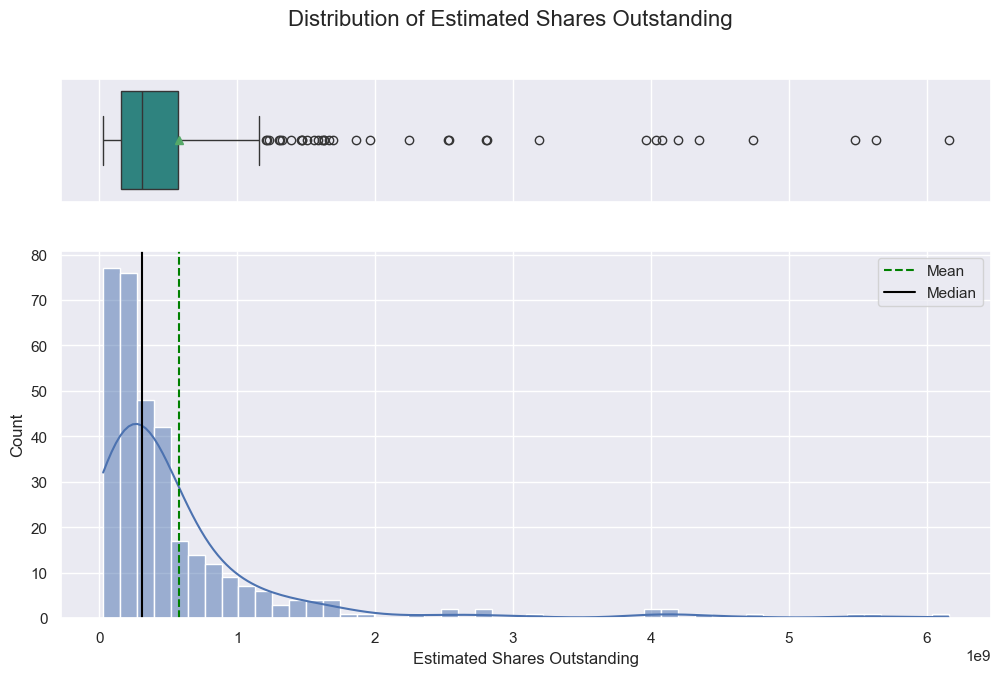

----------------------------------------------------------------------------------------------------
Distribution of 'P/E Ratio'
count   340.000
mean     32.613
std      44.349
min       2.935
25%      15.045
50%      20.820
75%      31.765
max     528.039
Name: P/E Ratio, dtype: float64


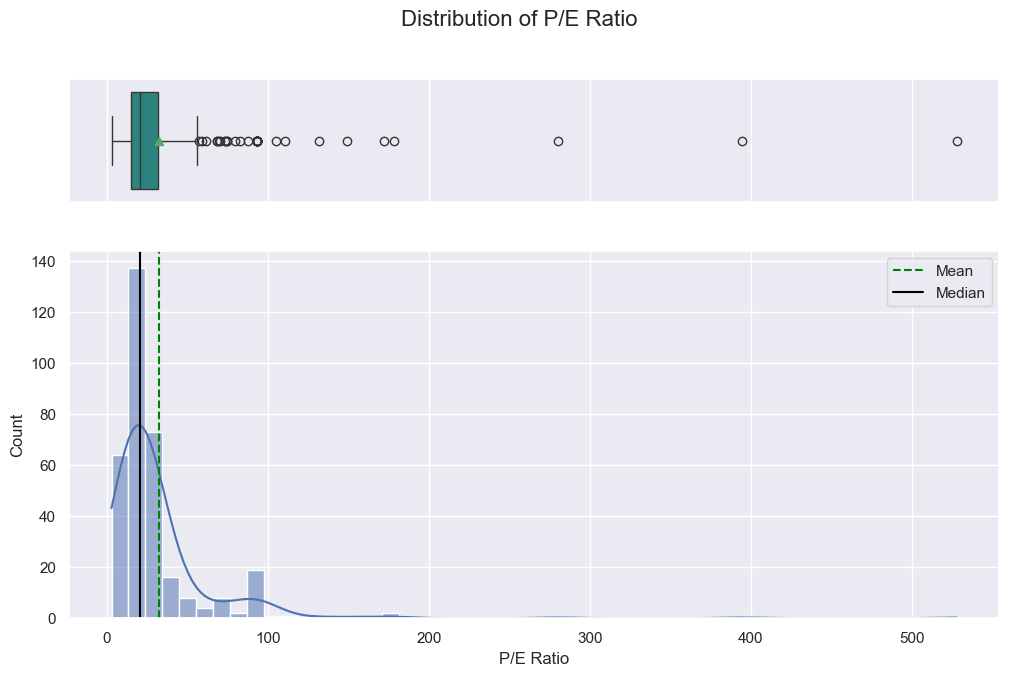

----------------------------------------------------------------------------------------------------
Distribution of 'P/B Ratio'
count   340.000
mean     -1.718
std      13.967
min     -76.119
25%      -4.352
50%      -1.067
75%       3.917
max     129.065
Name: P/B Ratio, dtype: float64


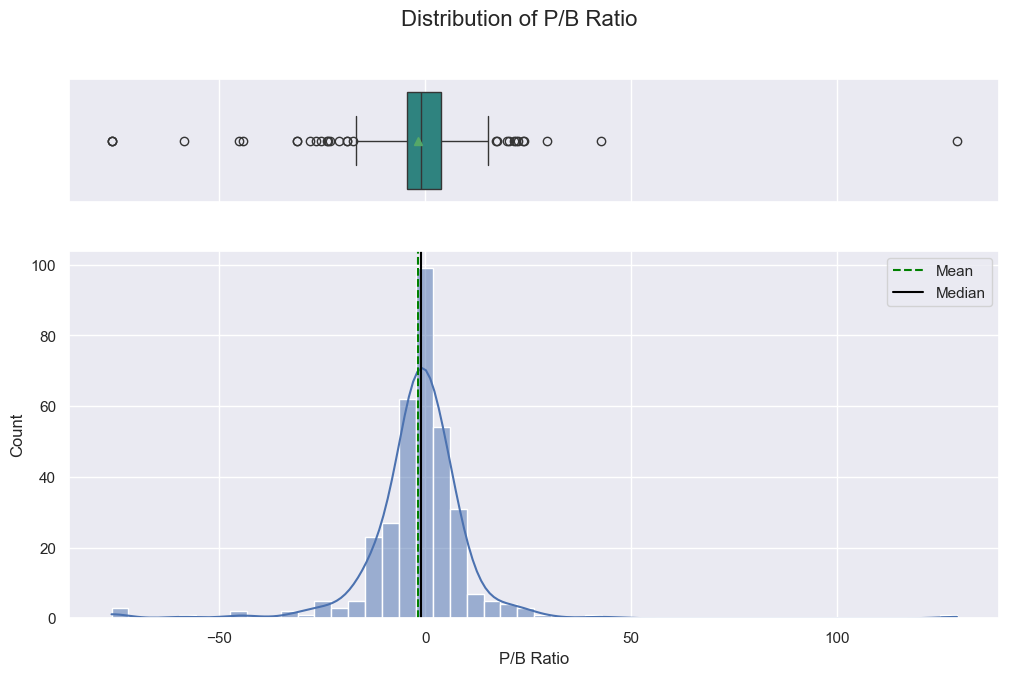

----------------------------------------------------------------------------------------------------


In [19]:
# Making a list of all numerical variables ('int64', 'float64', 'complex')
num_cols = df_eda.select_dtypes(include=["int64", "float64", "complex"]).columns

# Iterate through each numerical column and plot the histogram and boxplot combined
for column in num_cols:
    print(f"Distribution of '{column}'")
    print(df_eda[column].describe())
    histogram_boxplot(df_eda, column, bins=50, kde=True)
    print("-" * 100)


**Observations:**

- We can immediately see there are a lot of outliers in the dataset.


### <a id='toc1_4_3_'></a>[Multivariate Analysis](#toc0_)


#### <a id='toc1_4_3_1_'></a>[Heatmap](#toc0_)


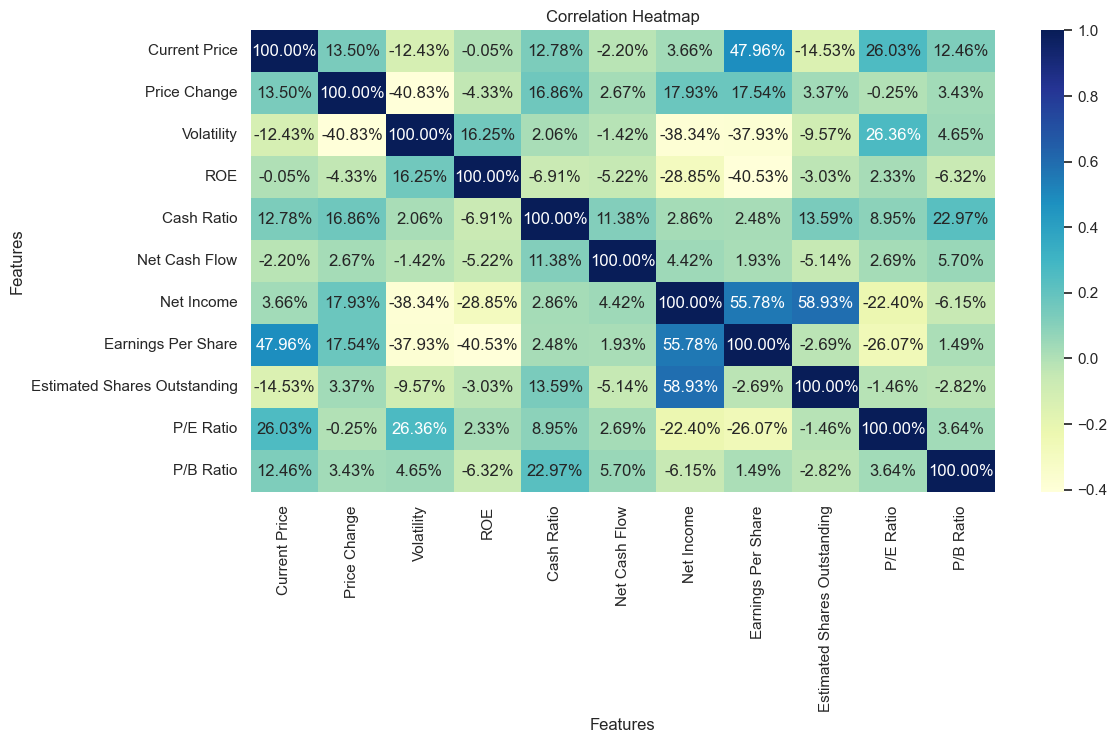

In [20]:
# Calculate the correlation matrix
corr_matrix = df_eda[num_cols].corr()

# Visual representation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


**Observations:**

- There is a high correlation between `Current Price`, `Earnings Per Share`, and `P/E Ratio`.
- There is a high correlation between `Price Change`, `Net Income`, and `Earnings Per Share`. However, there is a strong negative correlation between `Price Change` and `Volatility`.
- There is a high correlation between `Volatility`, `P/E Ratio`, and `ROE`. However, there is a strong negative correlation between `Volatility` and `Price Change`.
- There is a high negative correlation between `ROE` and `Earnings Per Share`.
- There is a high correlation between `Cash Ratio` and `P/B Ratio`.
- `Net Cash Flow` and `Cash Ratio` are mostly correlated with each other.
- `Net Income` is highly correlated with `Estimated Shares Outstanding` and `Earnings Per Share`. However there is a strong negative correlation between `Net Income` and `Volatility`.
- `Earnings Per Share` is highly correlated with `Current Price` and `Net Income`. However there is a strong negative correlation between `Earnings Per Share` and `ROE`.
- `Estimated Shares Outstanding` is highly correlated with `Net Income`.
- As mentioned before, `P/E Ratio` is highly correlated with `Volatility` and `Current Price`.
- `P/B Ratio` is highly correlated with `Cash Ratio`.


### <a id='toc1_4_4_'></a>[What does the distribution of stock prices look like?](#toc0_)


Distribution of Current Price
count    340.000
mean      80.862
std       98.055
min        4.500
25%       38.555
50%       59.705
75%       92.880
max     1274.950
Name: Current Price, dtype: float64


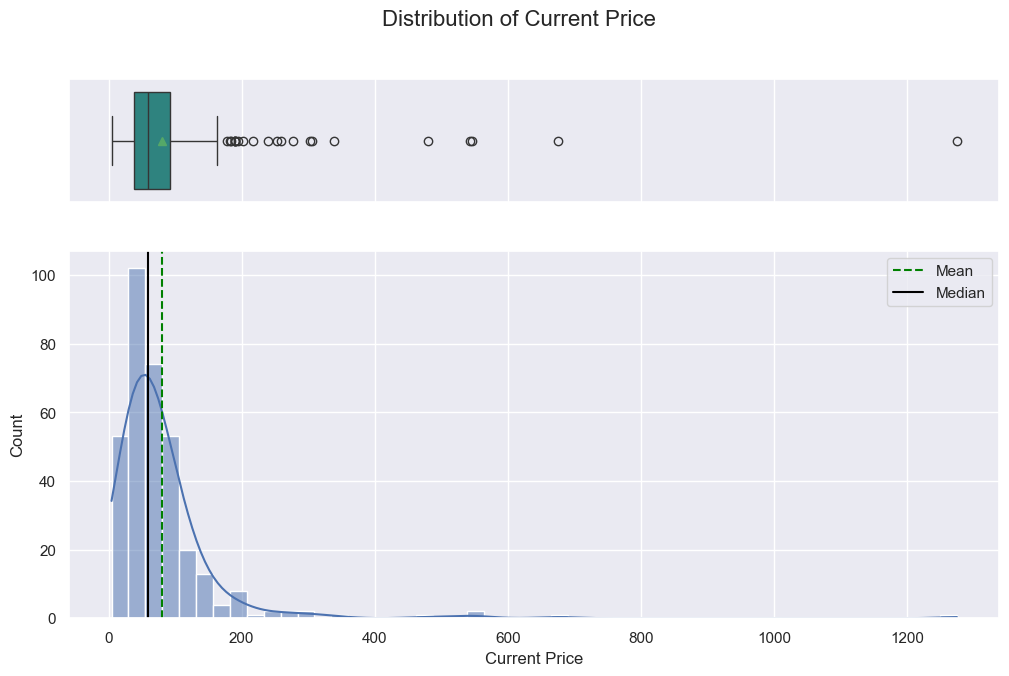

----------------------------------------------------------------------------------------------------


In [21]:
# histogram_boxplot(df_eda, "Current Price", kde=True)

print(f"Distribution of Current Price")
print(df_eda["Current Price"].describe())
histogram_boxplot(df_eda, "Current Price", bins=50, kde=True)
print("-" * 100)


**Observations:**
- The majority of stocks are priced under $100, making them relatively affordable for most investors. However, the presence of high-priced stocks could indicate premium or high-growth companies, which might be more volatile and require careful risk management. 
- Investors might want to focus on stocks priced closer to the median or explore opportunities in the outliers if they align with a growth investment strategy.

### <a id='toc1_4_5_'></a>[The stocks of which economic sector have seen the maximum price increase on average?](#toc0_)


In [22]:
print(f"Distribution of Price Change per GICS Sector")
sector_group = df_eda.groupby("GICS Sector")["Price Change"].mean().reset_index()
print(sector_group)


Distribution of Price Change per GICS Sector
                    GICS Sector  Price Change
0        Consumer Discretionary         5.846
1              Consumer Staples         8.685
2                        Energy       -10.228
3                    Financials         3.865
4                   Health Care         9.586
5                   Industrials         2.833
6        Information Technology         7.217
7                     Materials         5.590
8                   Real Estate         6.206
9   Telecommunications Services         6.957
10                    Utilities         0.804


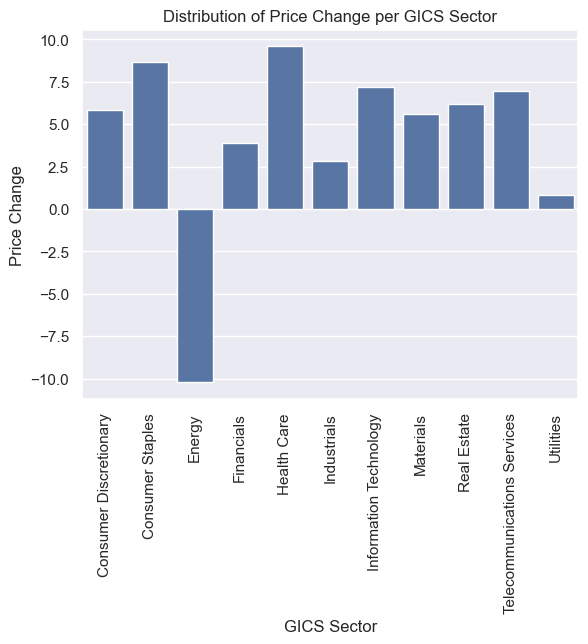

----------------------------------------------------------------------------------------------------


In [23]:
sns.barplot(data=sector_group, x="GICS Sector", y="Price Change", ci=True)
plt.xticks(rotation=90)
plt.title("Distribution of Price Change per GICS Sector")
plt.show()
print("-" * 100)


**Observations:**
- Health Care is leading in stock price growth, potentially driven by increased demand for medical services and pharmaceutical advancements.
- Consumer Staples continue to show strong performance, which might reflect the sector's resilience during economic uncertainty.
- Energy's decline may reflect volatility in energy markets, increased environmental concerns, or a shift toward alternative energy sources. Investors may need to exercise caution when investing in this sector.

### <a id='toc1_4_6_'></a>[How are the different variables correlated with each other?](#toc0_)


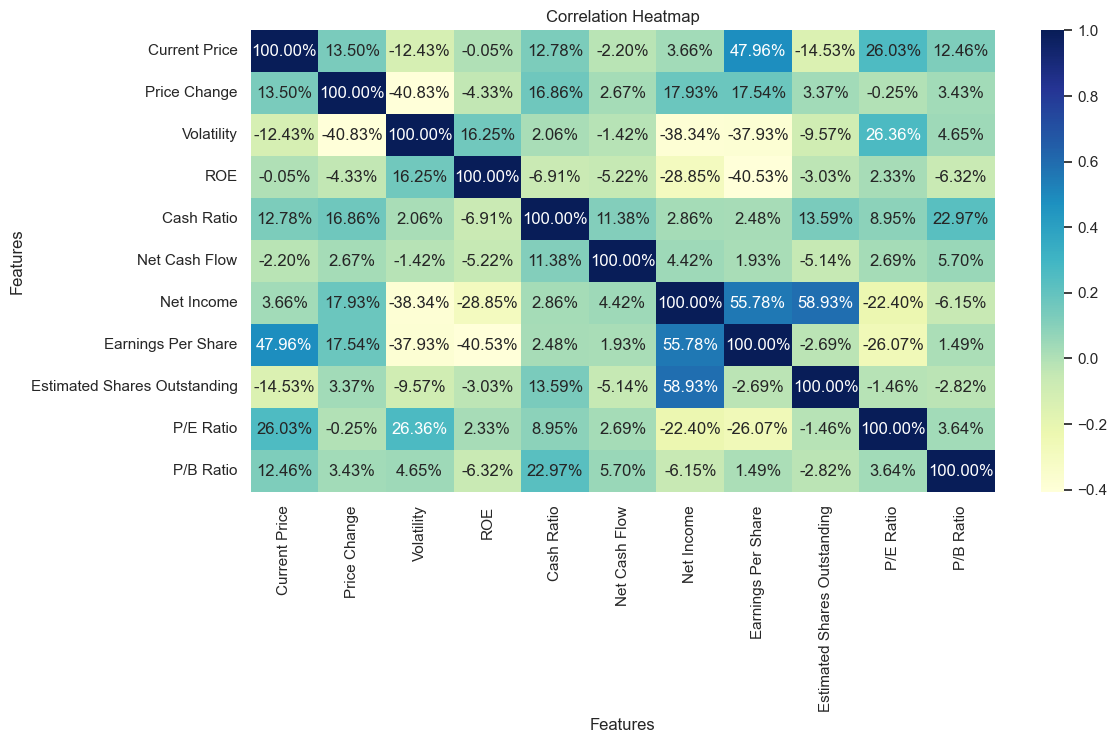

In [24]:
# Calculate the correlation matrix
corr_matrix = df_eda[num_cols].corr()

# Visual representation
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


**Observations:**

- There is a high correlation between `Current Price`, `Earnings Per Share`, and `P/E Ratio`.
- There is a high correlation between `Price Change`, `Net Income`, and `Earnings Per Share`. However, there is a strong negative correlation between `Price Change` and `Volatility`.
- There is a high correlation between `Volatility`, `P/E Ratio`, and `ROE`. However, there is a strong negative correlation between `Volatility` and `Price Change`.
- There is a high negative correlation between `ROE` and `Earnings Per Share`.
- There is a high correlation between `Cash Ratio` and `P/B Ratio`.
- `Net Cash Flow` and `Cash Ratio` are mostly correlated with each other.
- `Net Income` is highly correlated with `Estimated Shares Outstanding` and `Earnings Per Share`. However there is a strong negative correlation between `Net Income` and `Volatility`.
- `Earnings Per Share` is highly correlated with `Current Price` and `Net Income`. However there is a strong negative correlation between `Earnings Per Share` and `ROE`.
- `Estimated Shares Outstanding` is highly correlated with `Net Income`.
- As mentioned before, `P/E Ratio` is highly correlated with `Volatility` and `Current Price`.
- `P/B Ratio` is highly correlated with `Cash Ratio`.


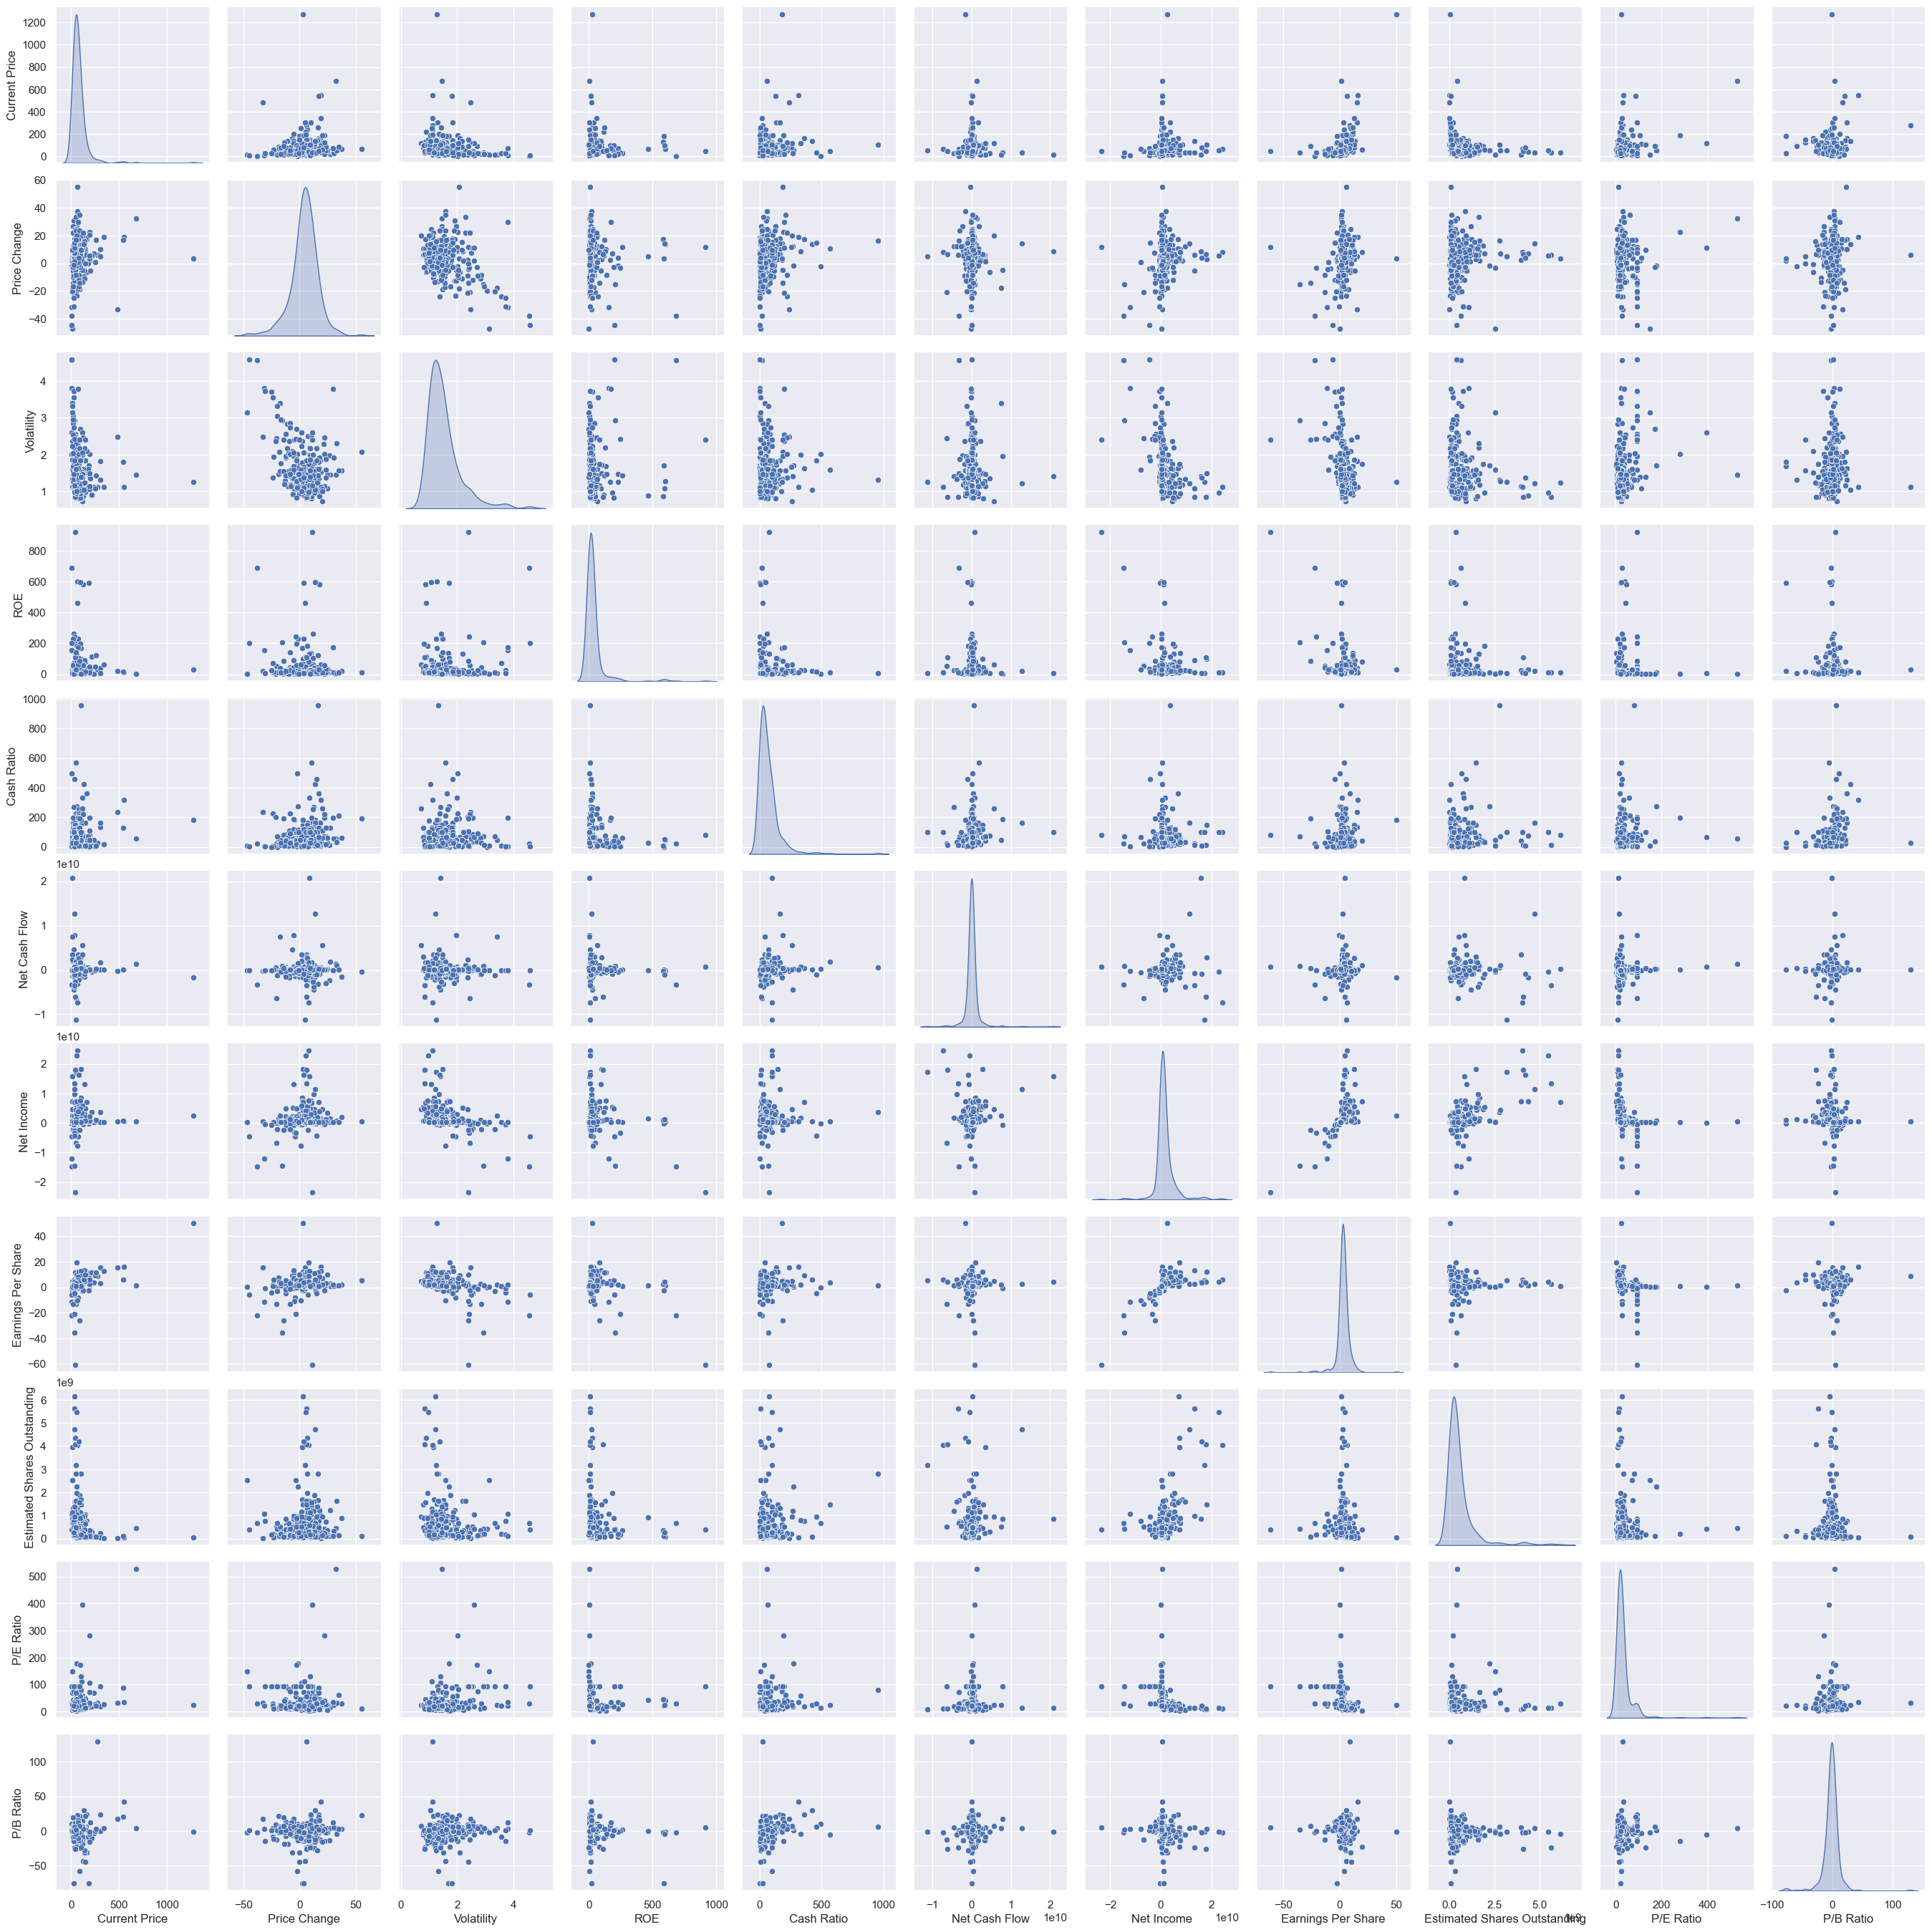

In [25]:
sns.pairplot(data=df_eda[num_cols], diag_kind="kde")
plt.show()


**Observations:**

- `Price Change`, `Net Cash Flow`, `Earnings Per Share`, and `Net Income` and `P/B Ratio` are almost Normally distributed. While the rest of the variables are Rightly skewed.


### <a id='toc1_4_7_'></a>[Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?](#toc0_)


Distribution of Cash Ratio per GICS Sector
                    GICS Sector  Cash Ratio
0        Consumer Discretionary      49.575
1              Consumer Staples      70.947
2                        Energy      51.133
3                    Financials      98.592
4                   Health Care     103.775
5                   Industrials      36.189
6        Information Technology     149.818
7                     Materials      41.700
8                   Real Estate      50.111
9   Telecommunications Services     117.000
10                    Utilities      13.625
----------------------------------------------------------------------------------------------------


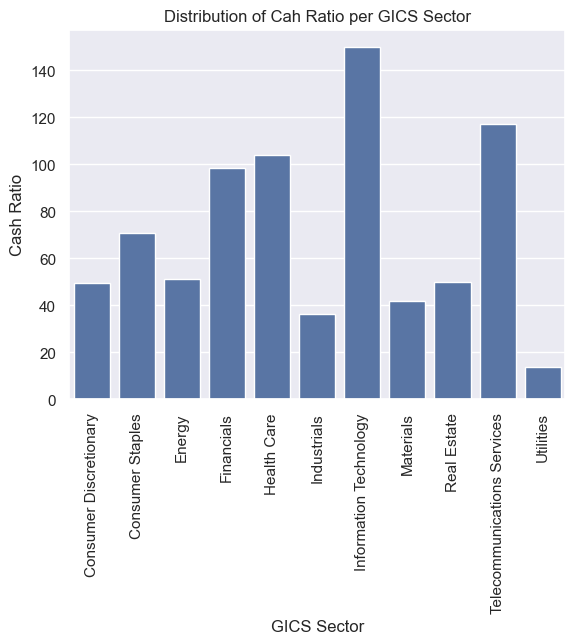

----------------------------------------------------------------------------------------------------


In [26]:
print(f"Distribution of Cash Ratio per GICS Sector")
sector_group = df_eda.groupby("GICS Sector")["Cash Ratio"].mean().reset_index()
print(sector_group)
print("-" * 100)

sns.barplot(data=sector_group, x="GICS Sector", y="Cash Ratio", ci=True)
plt.xticks(rotation=90)
plt.title("Distribution of Cah Ratio per GICS Sector")
plt.show()
print("-" * 100)


**Observations:**
- The Information Technology and Telecommunication Services sectors have the highest average cash ratios, indicating companies in these sectors hold substantial cash reserves relative to their liabilities.
- Sectors like Information Technology and Telecommunication Services could be considered more stable investments, as higher cash ratios suggest they can weather short-term downturns or market instability better than sectors with lower cash ratios, such as Utilities or Industrials.

### <a id='toc1_4_8_'></a>[P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?](#toc0_)


Distribution of P/E Ratio across GICS Sector
                    GICS Sector  P/E Ratio
0        Consumer Discretionary     35.212
1              Consumer Staples     25.521
2                        Energy     72.898
3                    Financials     16.023
4                   Health Care     41.135
5                   Industrials     18.259
6        Information Technology     43.783
7                     Materials     24.585
8                   Real Estate     43.066
9   Telecommunications Services     12.223
10                    Utilities     18.719
----------------------------------------------------------------------------------------------------


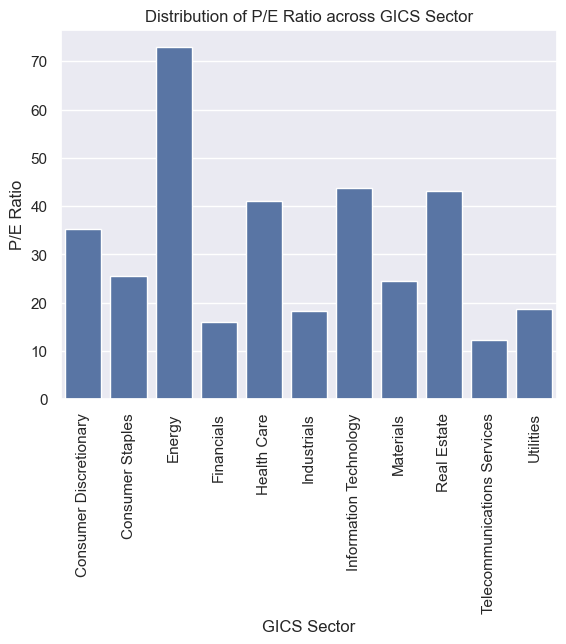

----------------------------------------------------------------------------------------------------


In [27]:
print(f"Distribution of P/E Ratio across GICS Sector")
sector_group = df_eda.groupby("GICS Sector")["P/E Ratio"].mean().reset_index()
print(sector_group)
print("-" * 100)

sns.barplot(data=sector_group, x="GICS Sector", y="P/E Ratio", ci=True)
plt.xticks(rotation=90)
plt.title("Distribution of P/E Ratio across GICS Sector")
plt.show()
print("-" * 100)


**Observations:**
- The Energy sector has the highest P/E ratio, suggesting that investors are paying a higher price for each dollar of earnings, possibly because of anticipated future growth. Conversely, Telecommunications Services has the lowest P/E ratio, indicating that it might be undervalued or seen as less growth-oriented.
- Investors with a long-term focus and higher risk tolerance might find opportunities in the Energy sector due to the high P/E ratio signaling growth expectations. On the other hand, Telecommunications Services could offer value investment opportunities for clients looking for steady, potentially undervalued stocks.

## <a id='toc1_5_'></a>[Data Preprocessing](#toc0_)

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)


In [28]:
# Copying data to another variable to avoid any changes to original data
df_preprocess = df_eda.copy()


### <a id='toc1_5_1_'></a>[Duplicate Value Check](#toc0_)

- As shown previously on the Data overview, there are no duplicates in the dataset.


### <a id='toc1_5_2_'></a>[Missing Value Treatment](#toc0_)

- No missing values were found in the dataset.


### <a id='toc1_5_3_'></a>[Outlier Check](#toc0_)


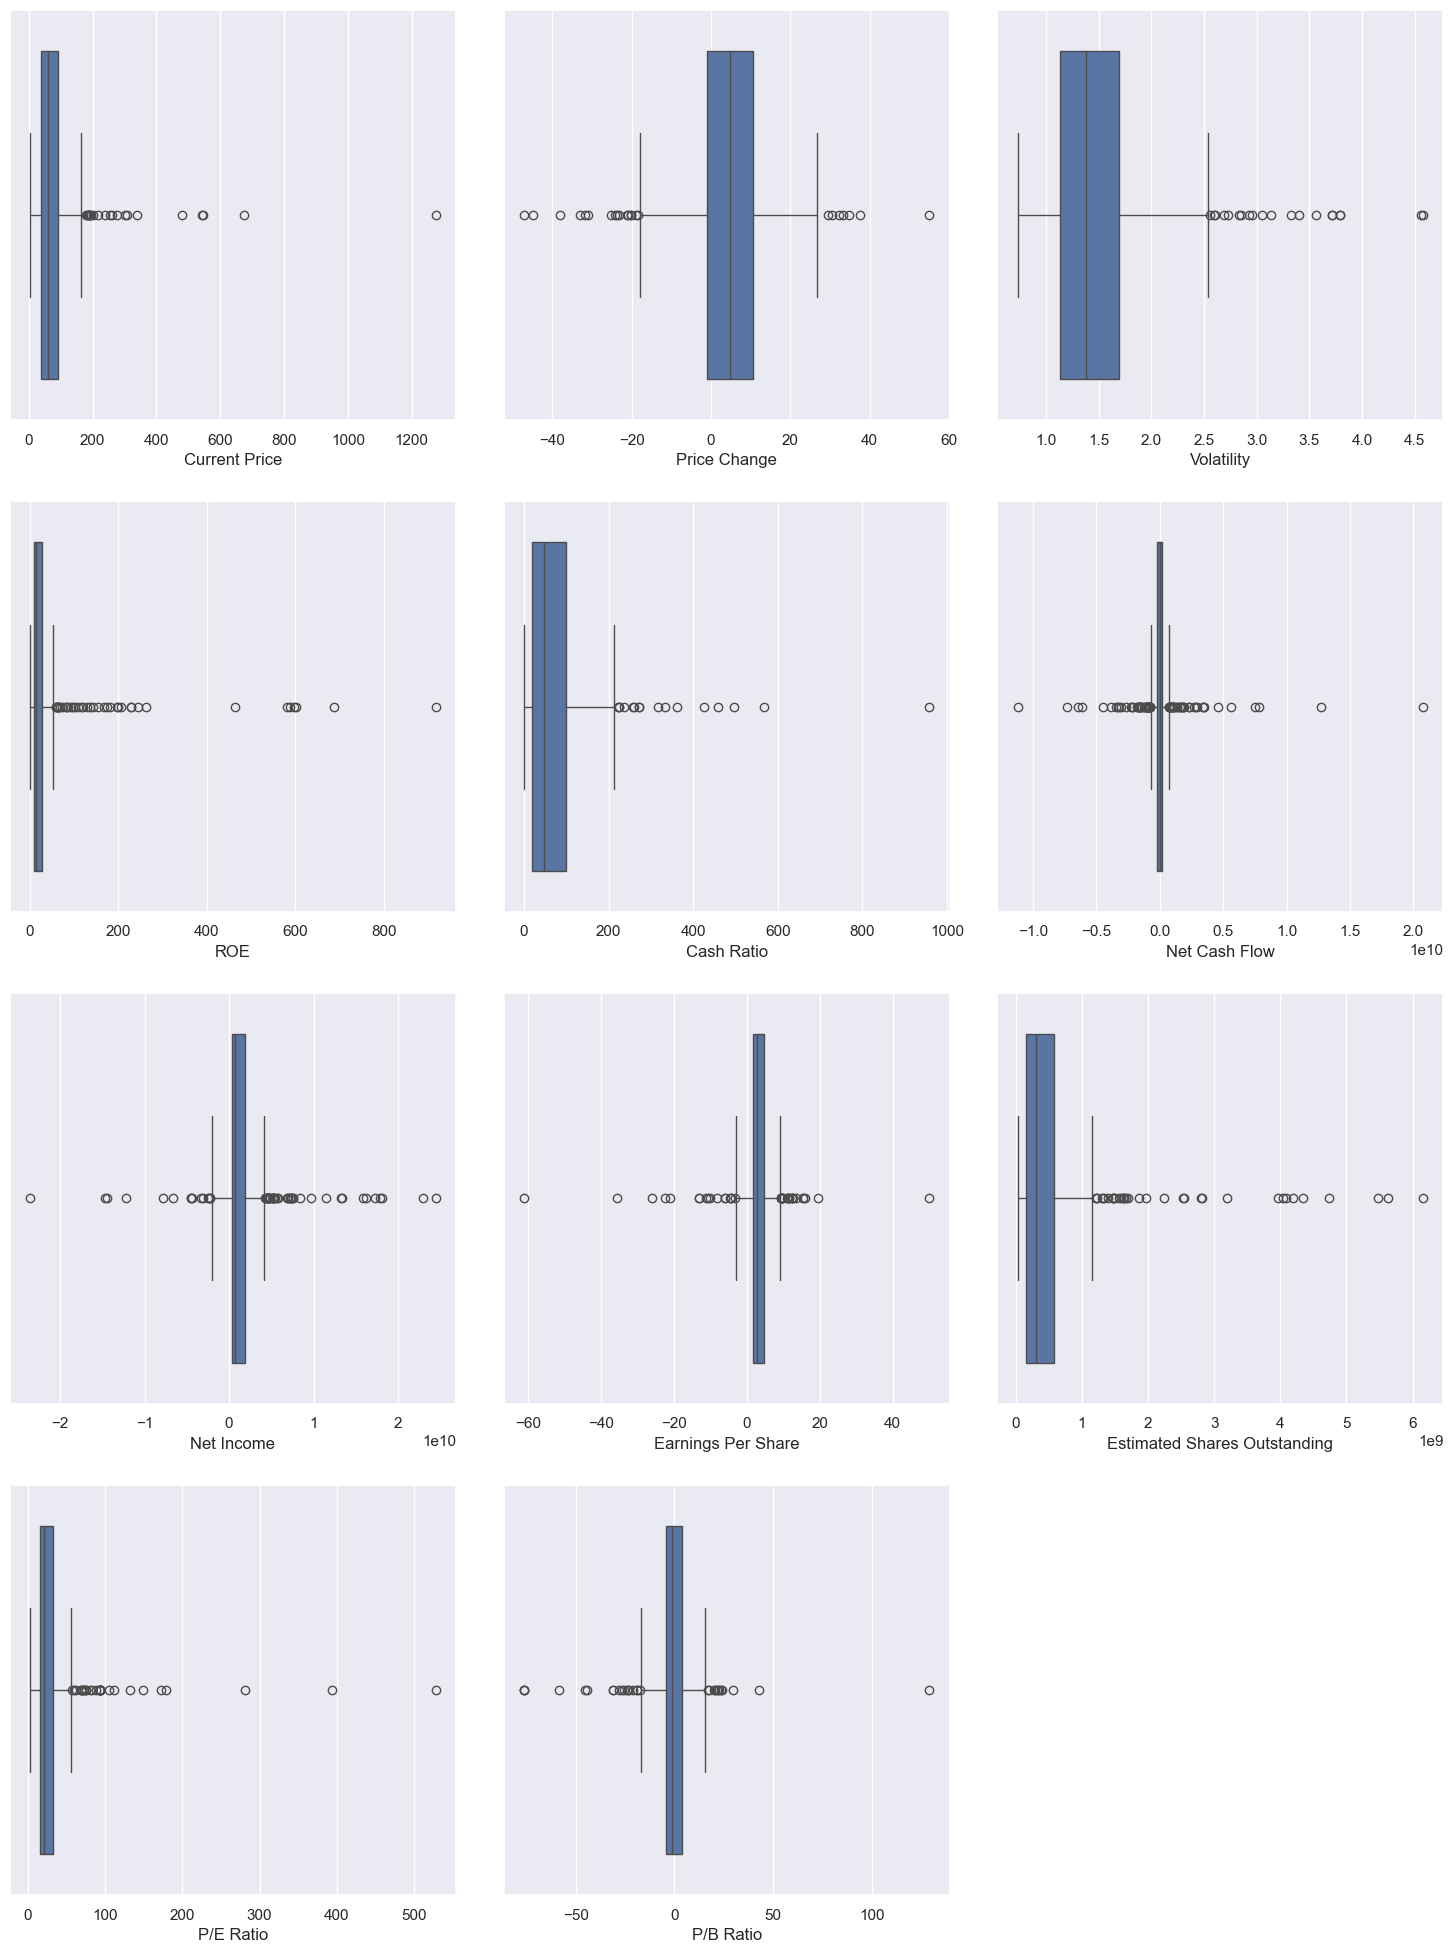

In [29]:
# Making a list of all numerical variables ('int64', 'float64', 'complex')
num_cols = df_preprocess.select_dtypes(include=["int64", "float64", "complex"]).columns

# Calculate the number of rows needed for the subplots
num_plots = len(num_cols)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)

# Create subplots
plt.figure(figsize=(15, num_rows * 5))
for i, variable in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=df_preprocess, x=variable)
    plt.tight_layout(pad=2)
plt.show()


In [ ]:
# Check for outliers in continuous variables
outliers = df_preprocess[num_cols].describe().T
print("\nSummary of the numerical features, including outliers:")
display(outliers)



Summary of the numerical features, including outliers:


count           mean            std  \
Current Price                340.000         80.862         98.055   
Price Change                 340.000          4.078         12.006   
Volatility                   340.000          1.526          0.592   
ROE                          340.000         39.597         96.548   
Cash Ratio                   340.000         70.024         90.421   
Net Cash Flow                340.000   55537620.588 1946365312.176   
Net Income                   340.000 1494384602.941 3940150279.328   
Earnings Per Share           340.000          2.777          6.588   
Estimated Shares Outstanding 340.000  577028337.754  845849595.418   
P/E Ratio                    340.000         32.613         44.349   
P/B Ratio                    340.000         -1.718         13.967   

                                          min            25%           50%  \
Current Price                           4.500         38.555        59.705   
Price Change                          -47.130         -0.939         4.820   
Volatility                              0.733          1.135         1.386   
ROE                                     1.000          9.750        15.000   
Cash Ratio                              0.000         18.000        47.000   
Net Cash Flow                -11208000000.000 -193906500.000   2098000.000   
Net Income                   -23528000000.000  352301250.000 707336000.000   
Earnings Per Share                    -61.200          1.558         2.895   
Estimated Shares Outstanding     27672156.860  158848216.100 309675137.800   
P/E Ratio                               2.935         15.045        20.820   
P/B Ratio                             -76.119         -4.352        -1.067   

                                        75%             max  
Current Price                        92.880        1274.950  
Price Change                         10.695          55.052  
Volatility                            1.696           4.580  
ROE                                  27.000         917.000  
Cash Ratio                           99.000         958.000  
Net Cash Flow                 169810750.000 20764000000.000  
Net Income                   1899000000.000 24442000000.000  
Earnings Per Share                    4.620          50.090  
Estimated Shares Outstanding  573117457.325  6159292035.000  
P/E Ratio                            31.765         528.039  
P/B Ratio                             3.917         129.065

**Observations & Outlier Treatment Decision:**

- Since there are outliers on every variable, we will not be removing them as we seek to achieve a more accurate model by keeping as much data as possible.
- This is conflicting as k-means clustering is sensitive to outliers since it is based on Euclidean distance.
- Will experiment with different distances to see if we can get better results.


### <a id='toc1_5_4_'></a>[Feature Engineering](#toc0_)

- Before Clustering, we will be scaling the dataset.


In [31]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(
        df_preprocess.drop(
            ["Ticker Symbol", "Company", "GICS Sector", "GICS Sub Industry"], axis=1
        )
    ),
    columns=df_preprocess.drop(
        ["Ticker Symbol", "Company", "GICS Sector", "GICS Sub Industry"], axis=1
    ).columns,
)
subset_scaled_df.head()


Current Price  Price Change  Volatility    ROE  Cash Ratio  Net Cash Flow  \
0         -0.393         0.494       0.273  0.990      -0.211         -0.339   
1         -0.221         0.355       1.137  0.938       0.077         -0.002   
2         -0.367         0.602      -0.427 -0.193      -0.033          0.454   
3          0.134         0.826      -0.285 -0.317       1.218         -0.152   
4         -0.261        -0.493       0.296 -0.266       2.237          0.134   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
0       1.554               1.309                         0.108     -0.652   
1       0.928               0.057                         1.250     -0.312   
2       0.744               0.025                         1.098     -0.392   
3      -0.220              -0.231                        -0.092      0.947   
4      -0.203              -0.375                         1.978      3.293   

   P/B Ratio  
0     -0.507  
1     -0.504  
2      0.095  
3      0.424  
4      0.199

## <a id='toc1_6_'></a>[EDA](#toc0_)

- We do not need to repeat EDA as no data transformation was performed.


## <a id='toc1_7_'></a>[K-means Clustering](#toc0_)


- As mentioned before, K-means clustering is sensitive to outliers since it is based on the Euclidean distance. This means that the presence of outliers (data points that are far from the majority of the data) can disproportionately affect the clustering results.

- Euclidean distance calculates the straight-line distance between two points in a multidimensional space. It squares the differences between each dimension, which makes larger distances grow exponentially.

- In K-means, the algorithm minimizes the sum of squared Euclidean distances between each data point and the nearest cluster center (centroid). So, if a data point (outlier) is very far from the centroid, its squared distance becomes disproportionately large, which can heavily influence the clustering process.

- It is expected that using euclidean may not be optimal, therefore we will compare euclidean distance to Manhattan distance which is normally the best option to use when the dataset contains outliers.


In [32]:
k_means_df = subset_scaled_df.copy()


### <a id='toc1_7_1_'></a>[Euclidean Distance](#toc0_)


Number of Clusters: 1, Average Distortion: 2.5425069919221697
Number of Clusters: 2, Average Distortion: 2.384499097487295
Number of Clusters: 3, Average Distortion: 2.2925536417824226
Number of Clusters: 4, Average Distortion: 2.175554082632614
Number of Clusters: 5, Average Distortion: 2.1401947809691793
Number of Clusters: 6, Average Distortion: 2.076138802310208
Number of Clusters: 7, Average Distortion: 2.037075625256342
Number of Clusters: 8, Average Distortion: 1.9949380420264025
Number of Clusters: 9, Average Distortion: 1.9458140679136828
Number of Clusters: 10, Average Distortion: 1.9005533102127603


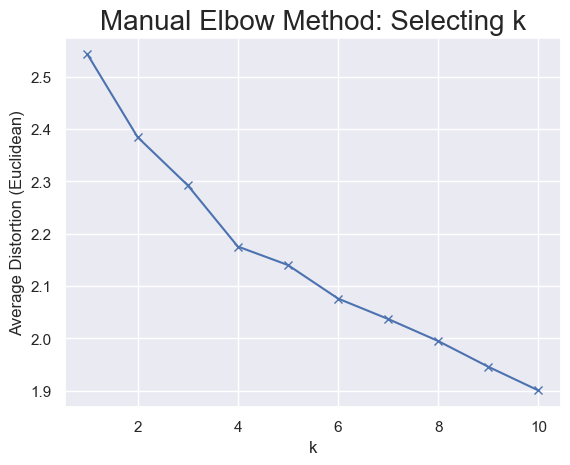

In [33]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Set random_state for consistency in clustering
random_state = 42

clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(subset_scaled_df)

    # Calculate the minimum Euclidean distances between points and centroids
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)
    print(f"Number of Clusters: {k}, Average Distortion: {distortion}")

# Plot the manual elbow method
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion (Euclidean)")
plt.title("Manual Elbow Method: Selecting k", fontsize=20)
plt.show()


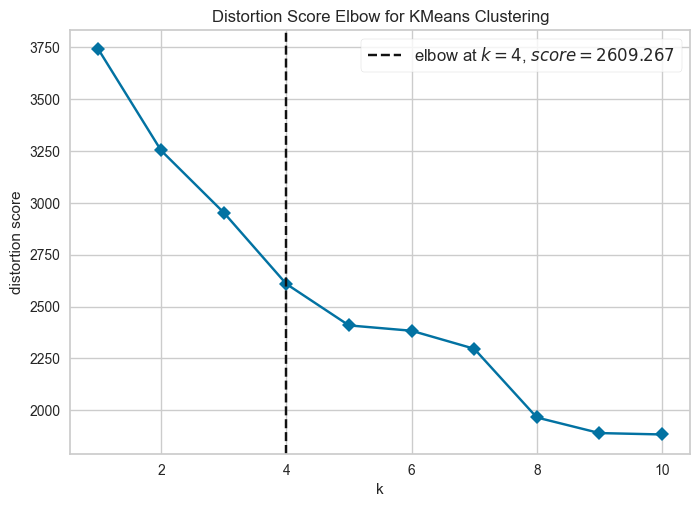

Number of Clusters: 1, Distortion (Inertia): 3740.0
Number of Clusters: 2, Distortion (Inertia): 3252.878836775759
Number of Clusters: 3, Distortion (Inertia): 2953.554619144185
Number of Clusters: 4, Distortion (Inertia): 2609.26745848811
Number of Clusters: 5, Distortion (Inertia): 2409.3300344471477
Number of Clusters: 6, Distortion (Inertia): 2383.512016630718
Number of Clusters: 7, Distortion (Inertia): 2296.6758430834216
Number of Clusters: 8, Distortion (Inertia): 1965.2842472897055
Number of Clusters: 9, Distortion (Inertia): 1890.0931643655993
Number of Clusters: 10, Distortion (Inertia): 1883.3398156684823


In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# # Reset variables before re-running the code
# meanDistortions = []
# clusters = range(1, 11)
# model = None  # Explicitly resetting model

# Instantiate the KMeans model with random_state for consistency
model = KMeans(random_state=random_state)

# Use KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(1, 11), metric="distortion", timings=False)

# Fit the visualizer to your data
visualizer.fit(subset_scaled_df)

# Display the elbow plot for KMeans function
visualizer.show()

# Print the distortion scores for each k value
for k, score in zip(range(1, 11), visualizer.k_scores_):
    print(f"Number of Clusters: {k}, Distortion (Inertia): {score}")


### <a id='toc1_7_2_'></a>[Silhouette Scores](#toc0_)


For n_clusters = 2, silhouette score is 0.4484662124740991
For n_clusters = 3, silhouette score is 0.4419662311474576
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.4670141851729817
For n_clusters = 6, silhouette score is 0.16609442972204497
For n_clusters = 7, silhouette score is 0.16010466610937854
For n_clusters = 8, silhouette score is 0.3811731688385819
For n_clusters = 9, silhouette score is 0.16110839502412727
For n_clusters = 10, silhouette score is 0.15641849202440433


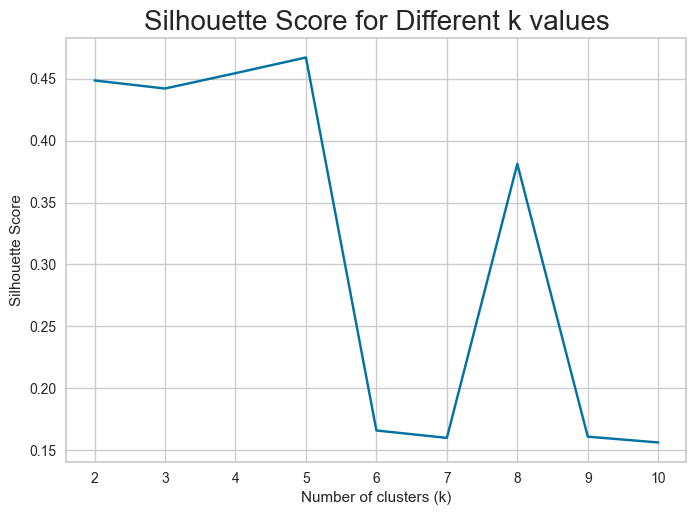

In [35]:
from sklearn.metrics import silhouette_score

# Reset silhouette scores list
sil_score = []

# Define the range of clusters to evaluate
cluster_list = list(range(2, 11))

# Loop through each value of k and calculate the silhouette score
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    preds = clusterer.fit_predict(subset_scaled_df)

    # Calculate the silhouette score
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print(f"For n_clusters = {n_clusters}, silhouette score is {score}")

# Plot silhouette scores
plt.plot(cluster_list, sil_score, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k values", fontsize=20)
plt.show()


In [36]:
# Find the best k based on the highest silhouette score
best_k = cluster_list[sil_score.index(max(sil_score))]
print(f"The best number of clusters based on silhouette score is {best_k}")


The best number of clusters based on silhouette score is 5


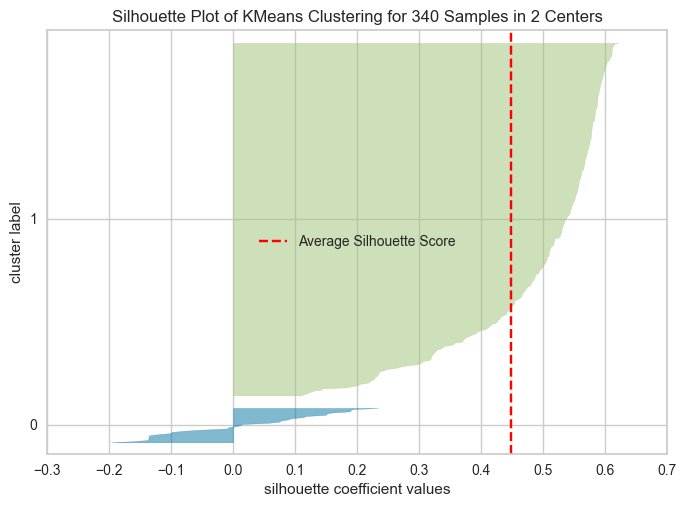

Silhouette visualization for k=2


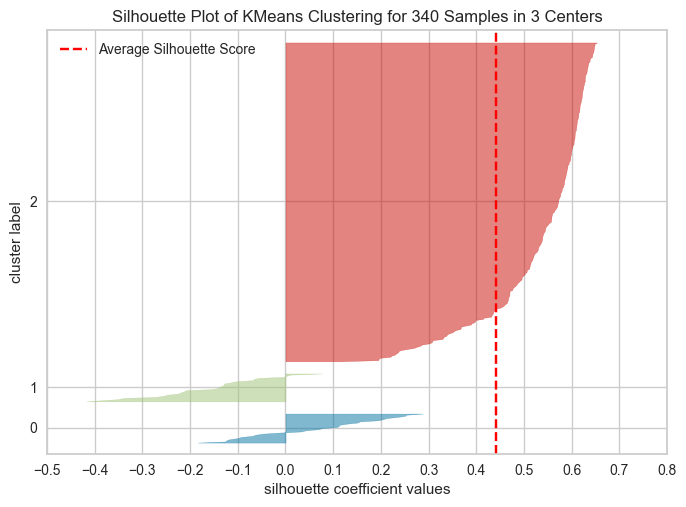

Silhouette visualization for k=3


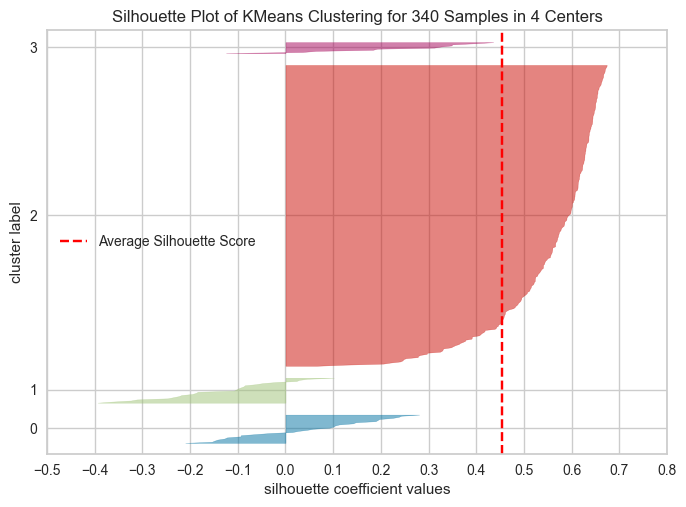

Silhouette visualization for k=4


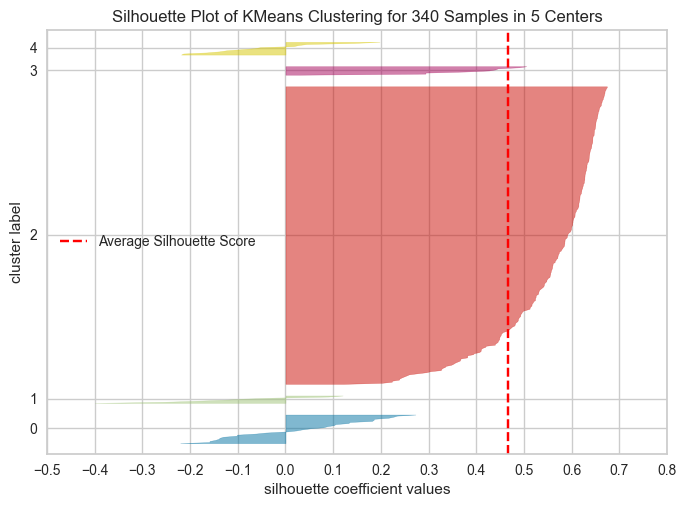

Silhouette visualization for k=5


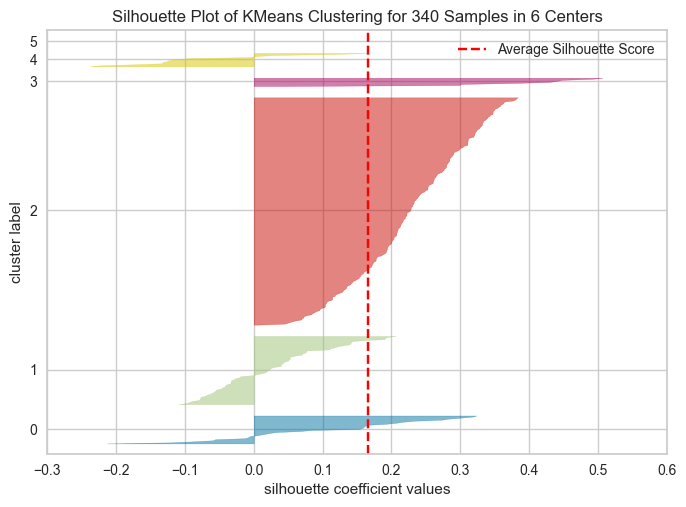

Silhouette visualization for k=6


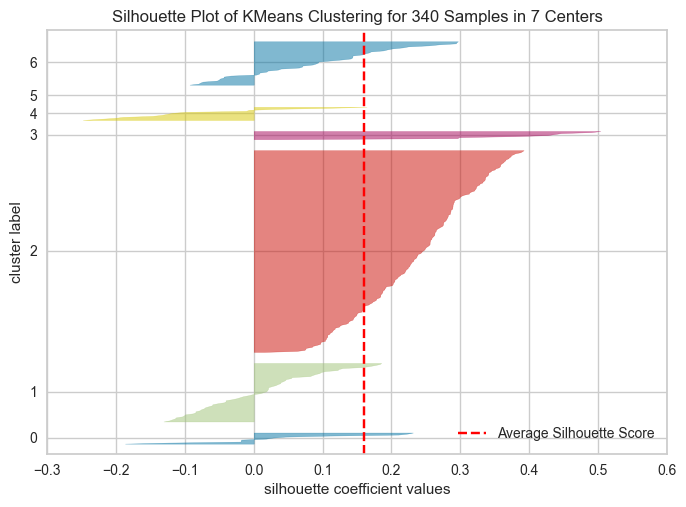

Silhouette visualization for k=7


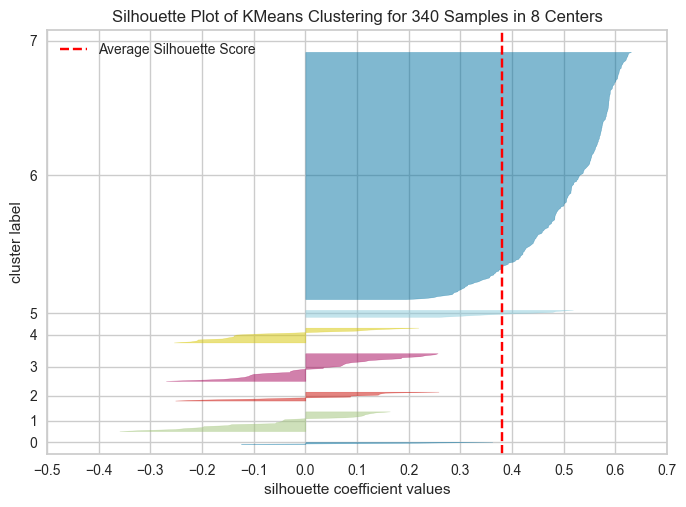

Silhouette visualization for k=8


In [37]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loop through different values of k and visualize the silhouette scores
for k in range(2, 9):  # You can adjust the range of k as needed
    model = KMeans(n_clusters=k, random_state=random_state)
    visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
    visualizer.fit(subset_scaled_df)  # Fit the visualizer
    visualizer.show()  # Display the plot
    print(f"Silhouette visualization for k={k}")


### <a id='toc1_7_3_'></a>[Manhattan Distance](#toc0_)


Number of Clusters: 1, Average Distortion (Manhattan): 5.887920700424354
Number of Clusters: 2, Average Distortion (Manhattan): 5.534184461736831
Number of Clusters: 3, Average Distortion (Manhattan): 5.359683791904254
Number of Clusters: 4, Average Distortion (Manhattan): 5.042952370294678
Number of Clusters: 5, Average Distortion (Manhattan): 4.9990458148429395
Number of Clusters: 6, Average Distortion (Manhattan): 4.852844319565218
Number of Clusters: 7, Average Distortion (Manhattan): 4.75454659014971
Number of Clusters: 8, Average Distortion (Manhattan): 4.672154080537953
Number of Clusters: 9, Average Distortion (Manhattan): 4.590444258025509
Number of Clusters: 10, Average Distortion (Manhattan): 4.421764971694322


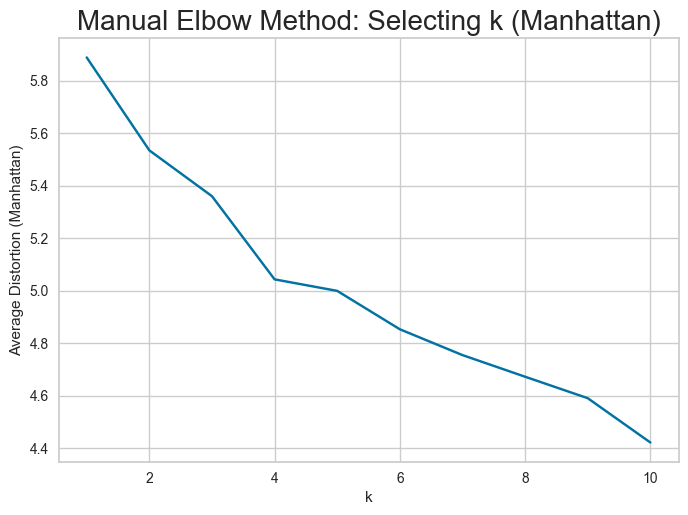

In [38]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# # Reset variables before re-running the code
# meanDistortions = []
# clusters = range(1, 11)
# model = None  # Explicitly resetting model

# Set random_state for consistency in clustering
random_state = 42

clusters = range(1, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(subset_scaled_df)

    # Calculate the minimum Manhattan distances (cityblock) between points and centroids
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "cityblock"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)
    print(f"Number of Clusters: {k}, Average Distortion (Manhattan): {distortion}")

# Plot the manual elbow method using Manhattan distance
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion (Manhattan)")
plt.title("Manual Elbow Method: Selecting k (Manhattan)", fontsize=20)
plt.show()


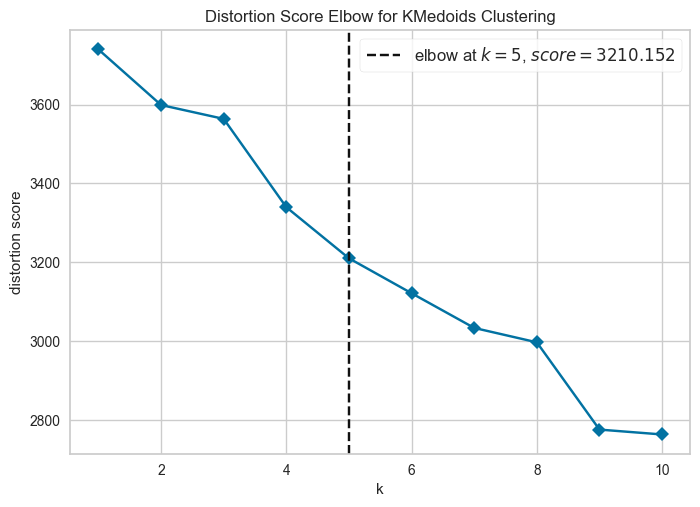

Number of Clusters: 1, Distortion (Manhattan): 3740.0
Number of Clusters: 2, Distortion (Manhattan): 3599.0496590004004
Number of Clusters: 3, Distortion (Manhattan): 3563.866147257635
Number of Clusters: 4, Distortion (Manhattan): 3339.8105619904245
Number of Clusters: 5, Distortion (Manhattan): 3210.1522152946554
Number of Clusters: 6, Distortion (Manhattan): 3121.4789480941636
Number of Clusters: 7, Distortion (Manhattan): 3033.4997271680777
Number of Clusters: 8, Distortion (Manhattan): 2996.966134862453
Number of Clusters: 9, Distortion (Manhattan): 2775.569281317075
Number of Clusters: 10, Distortion (Manhattan): 2763.179820869276


In [39]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# # Reset variables before re-running the code
# meanDistortions = []
# clusters = range(1, 11)
# model = None  # Explicitly resetting model

# Instantiate the KMedoids model with Manhattan distance
model = KMedoids(metric="manhattan", random_state=random_state)

# Use KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(
    model, k=(1, 11), metric="distortion", timings=False, locate_elbow=True
)

# Fit the visualizer to your data
visualizer.fit(subset_scaled_df)

# Display the elbow plot for KMedoids using Manhattan distance
visualizer.show()

# Print the distortion scores for each k value
for k, score in zip(range(1, 11), visualizer.k_scores_):
    print(f"Number of Clusters: {k}, Distortion (Manhattan): {score}")


### <a id='toc1_7_4_'></a>[Silhouette Scores](#toc0_)


For n_clusters = 2, silhouette score is 0.4484662124740991
For n_clusters = 3, silhouette score is 0.4419662311474576
For n_clusters = 4, silhouette score is 0.45434371948348606
For n_clusters = 5, silhouette score is 0.4670141851729817
For n_clusters = 6, silhouette score is 0.16609442972204497
For n_clusters = 7, silhouette score is 0.16010466610937854
For n_clusters = 8, silhouette score is 0.3811731688385819
For n_clusters = 9, silhouette score is 0.16110839502412727
For n_clusters = 10, silhouette score is 0.15641849202440433


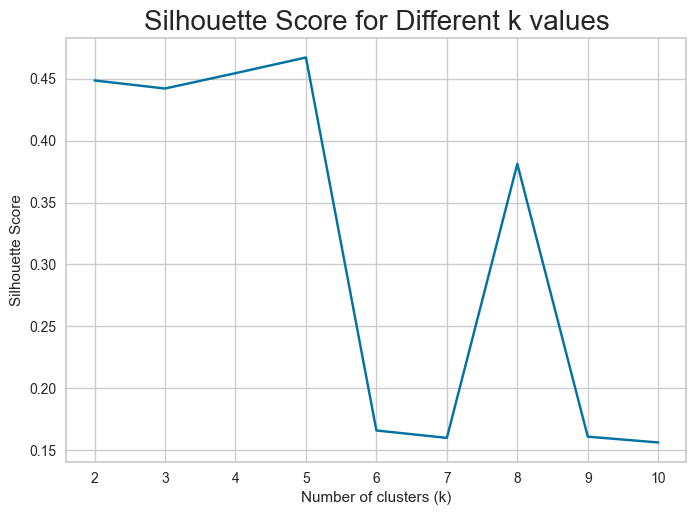

In [40]:
from sklearn.metrics import silhouette_score

# Reset silhouette scores list
sil_score = []

# Define the range of clusters to evaluate
cluster_list = list(range(2, 11))

# Loop through each value of k and calculate the silhouette score
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
    preds = clusterer.fit_predict(subset_scaled_df)

    # Calculate the silhouette score
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print(f"For n_clusters = {n_clusters}, silhouette score is {score}")

# Plot silhouette scores
plt.plot(cluster_list, sil_score, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k values", fontsize=20)
plt.show()


In [41]:
# Find the best k based on the highest silhouette score
best_k = cluster_list[sil_score.index(max(sil_score))]
print(f"The best number of clusters based on silhouette score is {best_k}")


The best number of clusters based on silhouette score is 5


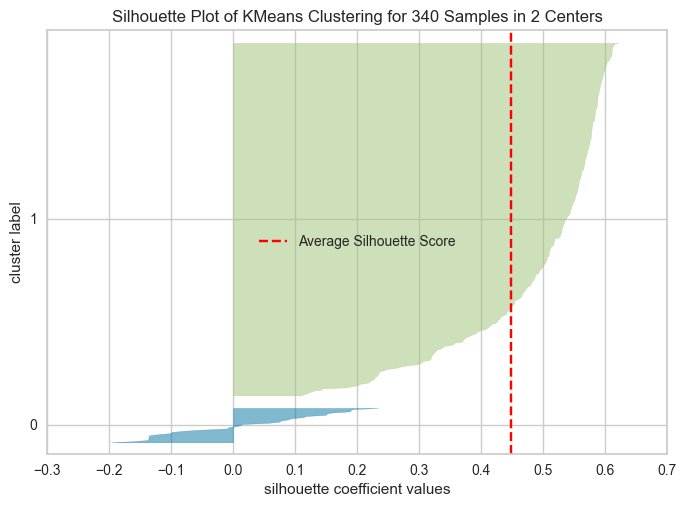

Silhouette visualization for k=2


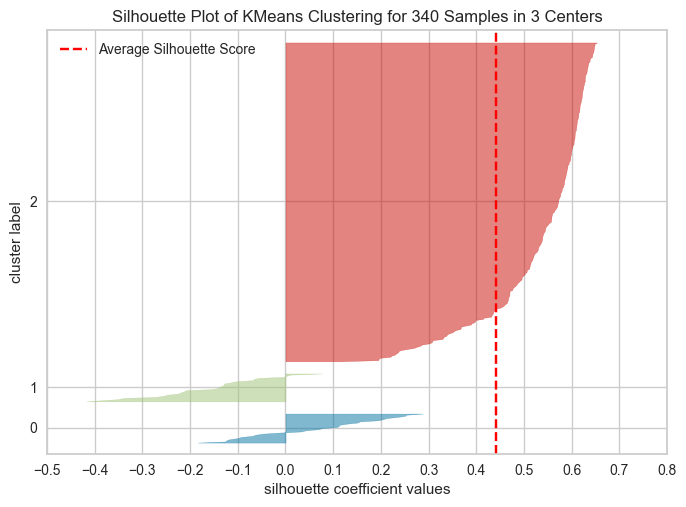

Silhouette visualization for k=3


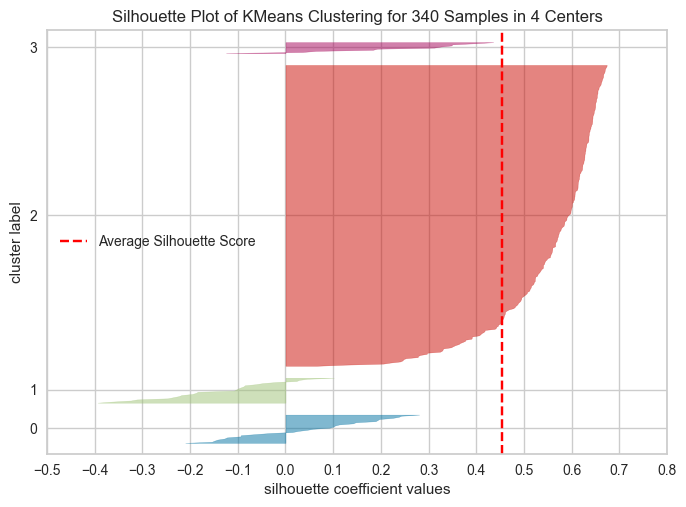

Silhouette visualization for k=4


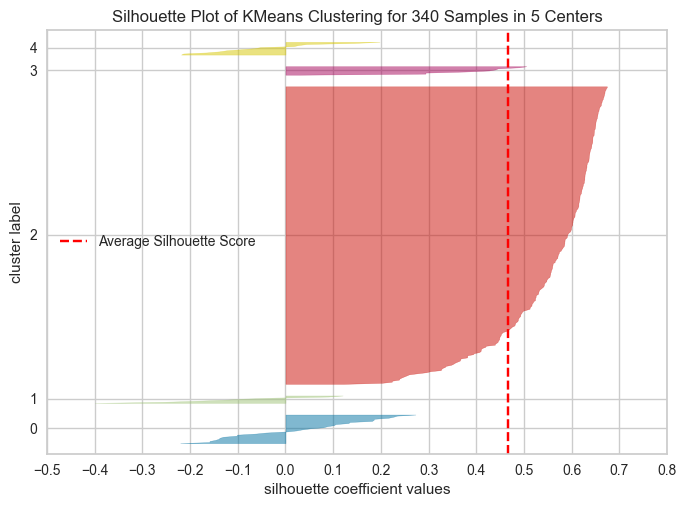

Silhouette visualization for k=5


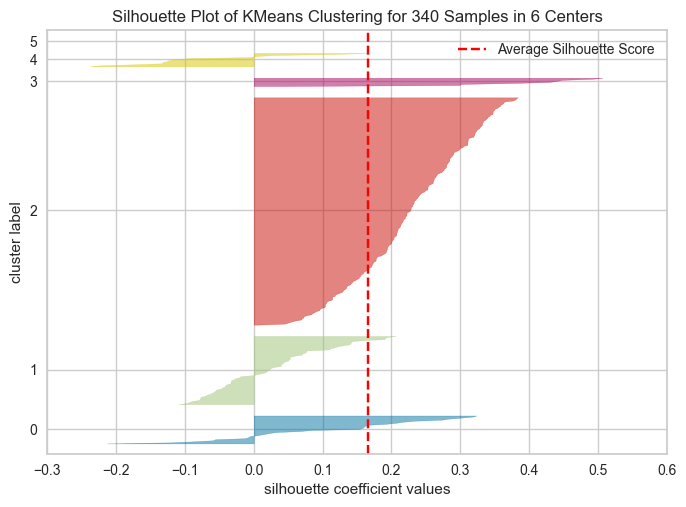

Silhouette visualization for k=6


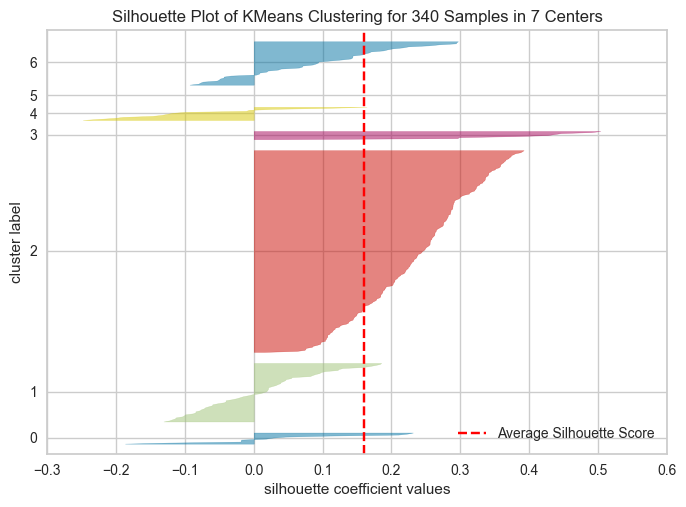

Silhouette visualization for k=7


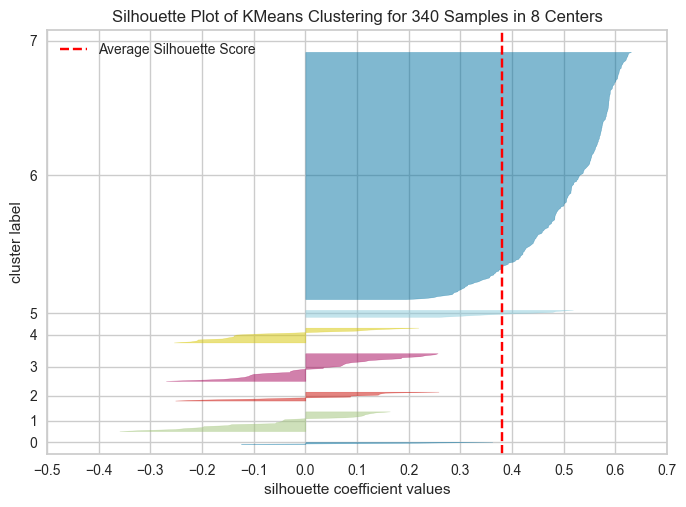

Silhouette visualization for k=8


In [42]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loop through different values of k and visualize the silhouette scores
for k in range(2, 9):  # You can adjust the range of k as needed
    model = KMeans(n_clusters=k, random_state=random_state)
    visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
    visualizer.fit(subset_scaled_df)  # Fit the visualizer
    visualizer.show()  # Display the plot
    print(f"Silhouette visualization for k={k}")


**We will be using K=5 as the appropriate number of clusters based on the following criteria:**

- Higher Average Silhouette Score: K=5 maintains a relatively high average silhouette score compared to higher values of k.
- Good Cluster Separation: The clusters are well-separated with only a small number of points having low silhouette values.
- Balanced Clustering: It doesn't over-segment the data into too many small clusters, while still maintaining a good balance of separation and cohesion.


In [43]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(subset_scaled_df)


KMeans(n_clusters=5, random_state=1)

In [44]:
# Create a copy of the original dataframe (df_preprocess) with categorical columns
df1 = df_preprocess.copy()

# Add KMeans cluster labels to both original and scaled dataframes
df1["KM_segments"] = kmeans.labels_
subset_scaled_df["KM_segments"] = kmeans.labels_

# Ensure df1 contains both numerical and non-numerical columns
df1.head()


Ticker Symbol                  Company             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines         42.350        10.000       1.687  135   
1        Pharmaceuticals         59.240         8.339       2.198  130   
2  Health Care Equipment         44.910        11.301       1.274   21   
3   Application Software         93.940        13.977       1.358    9   
4         Semiconductors         55.320        -1.828       1.701   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000              11.390   
1          77       51000000  5144000000               3.150   
2          67      938000000  4423000000               2.940   
3         180     -240840000   629551000               1.260   
4         272      315120000   696878000               0.310   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  KM_segments  
0                 668129938.500      3.718     -8.784            0  
1                1633015873.000     18.806     -8.750            0  
2                1504421769.000     15.276     -0.394            0  
3                 499643650.800     74.556      4.200            0  
4                2247993548.000    178.452      1.060            1

### <a id='toc1_7_5_'></a>[Cluster Profiling](#toc0_)


In [45]:
# Select only numeric columns for calculating the mean
numeric_columns = df1.select_dtypes(include=[np.number]).columns

# Group by 'KM_segments' and calculate the mean for the numeric columns
km_cluster_profile = df1.groupby("KM_segments")[numeric_columns].mean()


In [46]:
# Count the number of companies in each cluster
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Company"].count().values
)


In [ ]:
km_cluster_profile.style.highlight_max(color="green", axis=0)


In [48]:
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Company"].unique())
    print()


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [49]:
df1.groupby(["KM_segments", "GICS Sector"])["Company"].count()


KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Energy                         21
             Health Care                     1
             Industrials                     1
             Information Technology          4
             Materials                       2
2            Energy                          2
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy

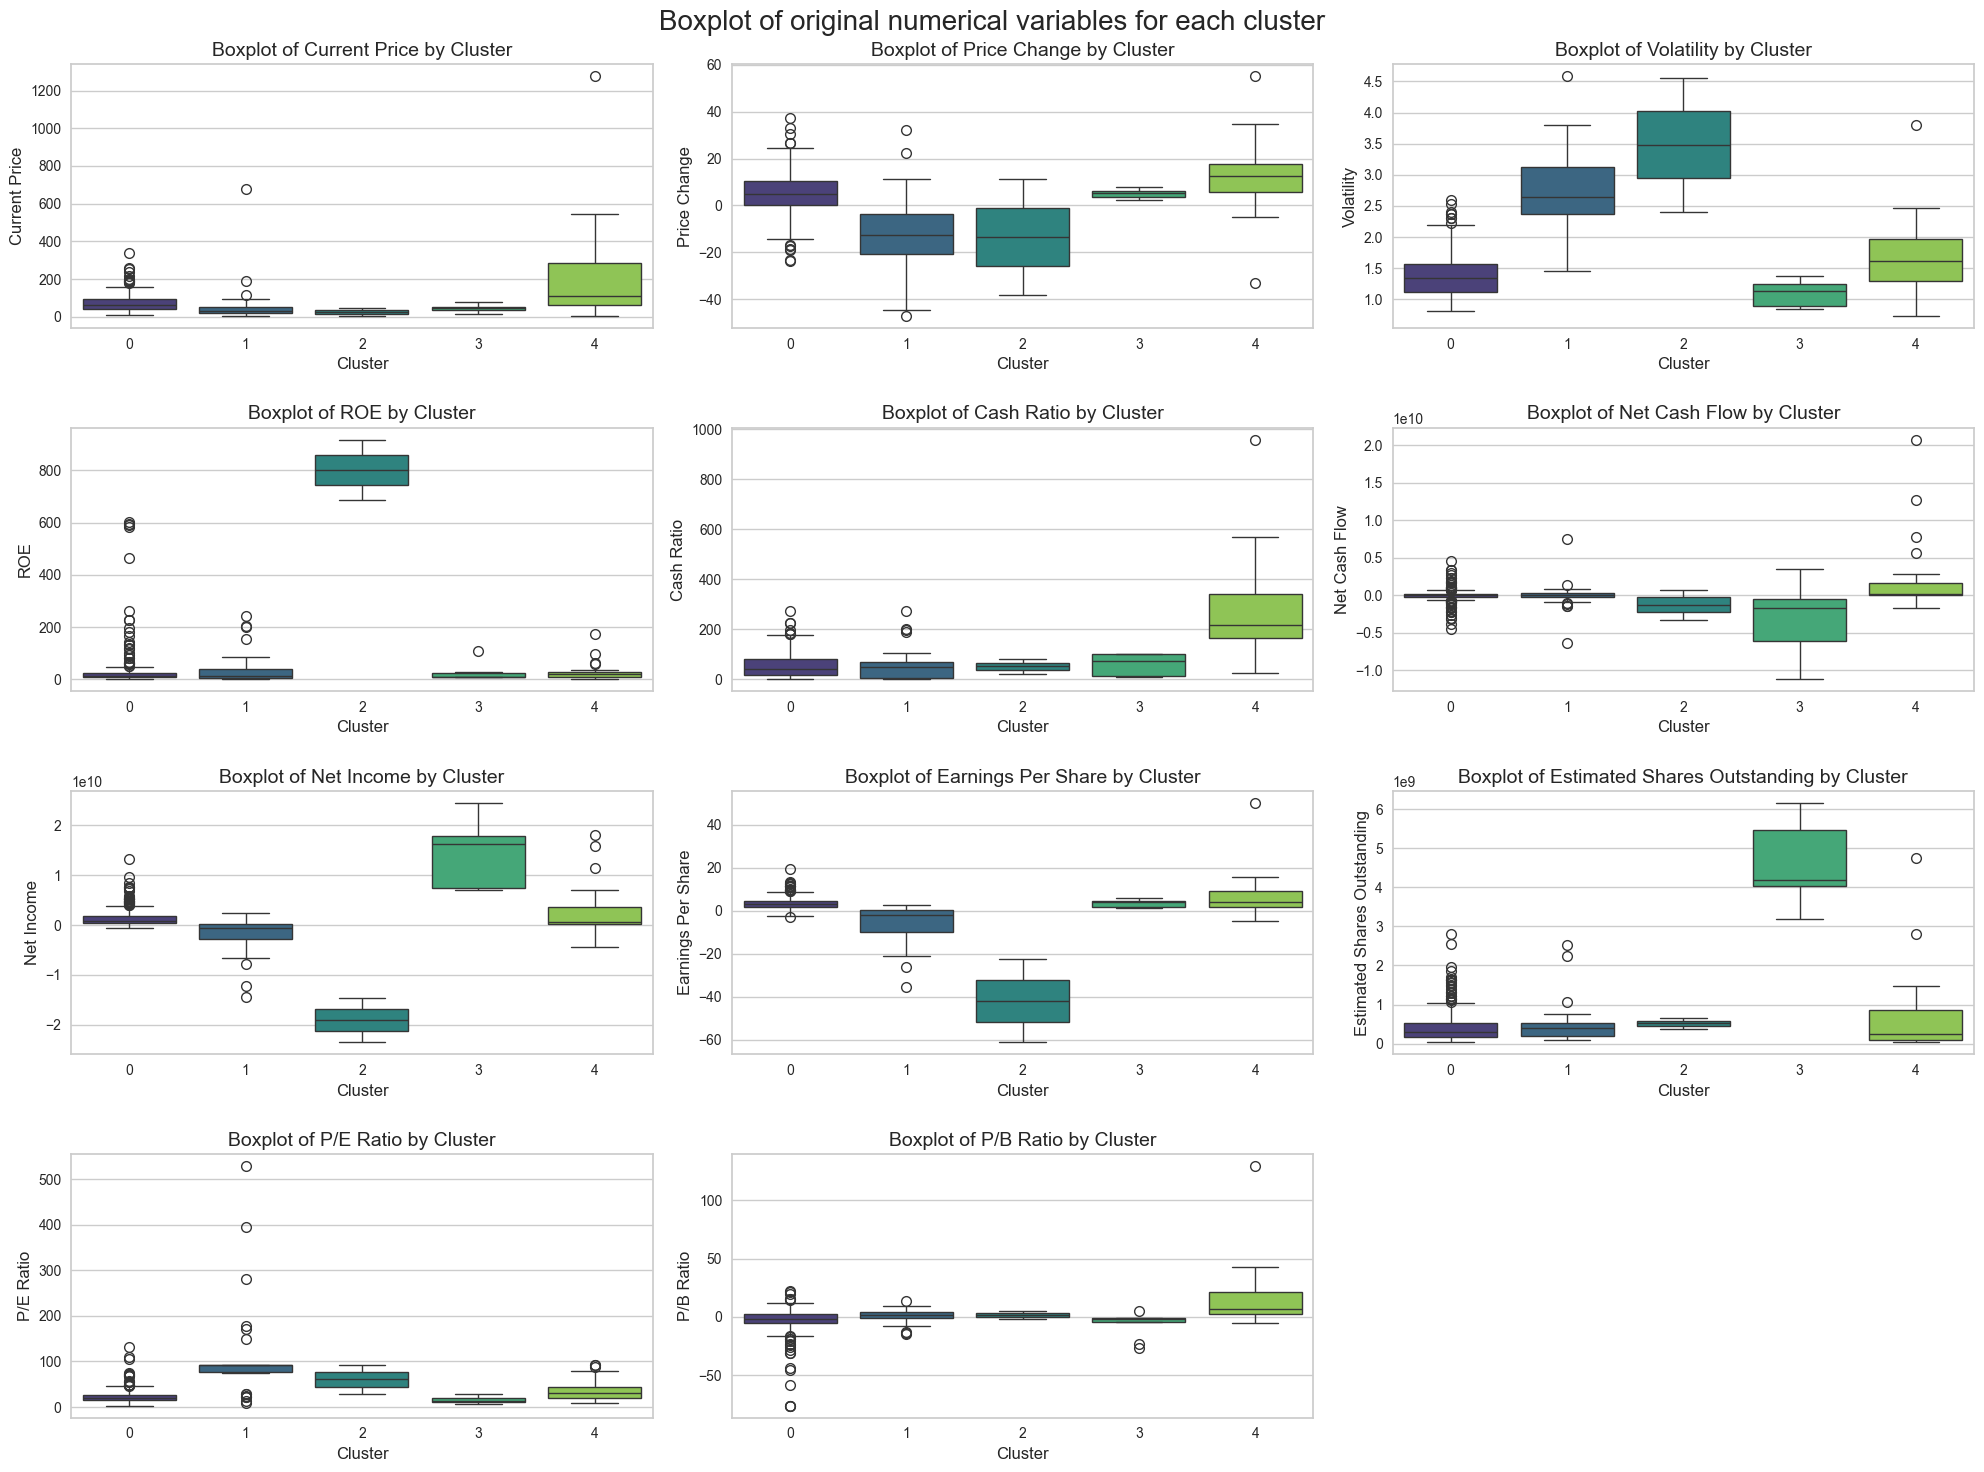

In [50]:
# Set up the size of the figure and the grid
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)


# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()

# Loop through each numerical column and create a boxplot
for i, column in enumerate(num_cols):
    sns.boxplot(x="KM_segments", y=column, data=df1, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Boxplot of {column} by Cluster", fontsize=14)
    axes[i].set_xlabel("Cluster", fontsize=12)
    axes[i].set_ylabel(column, fontsize=12)

# Remove any empty subplots if the number of features is less than 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()


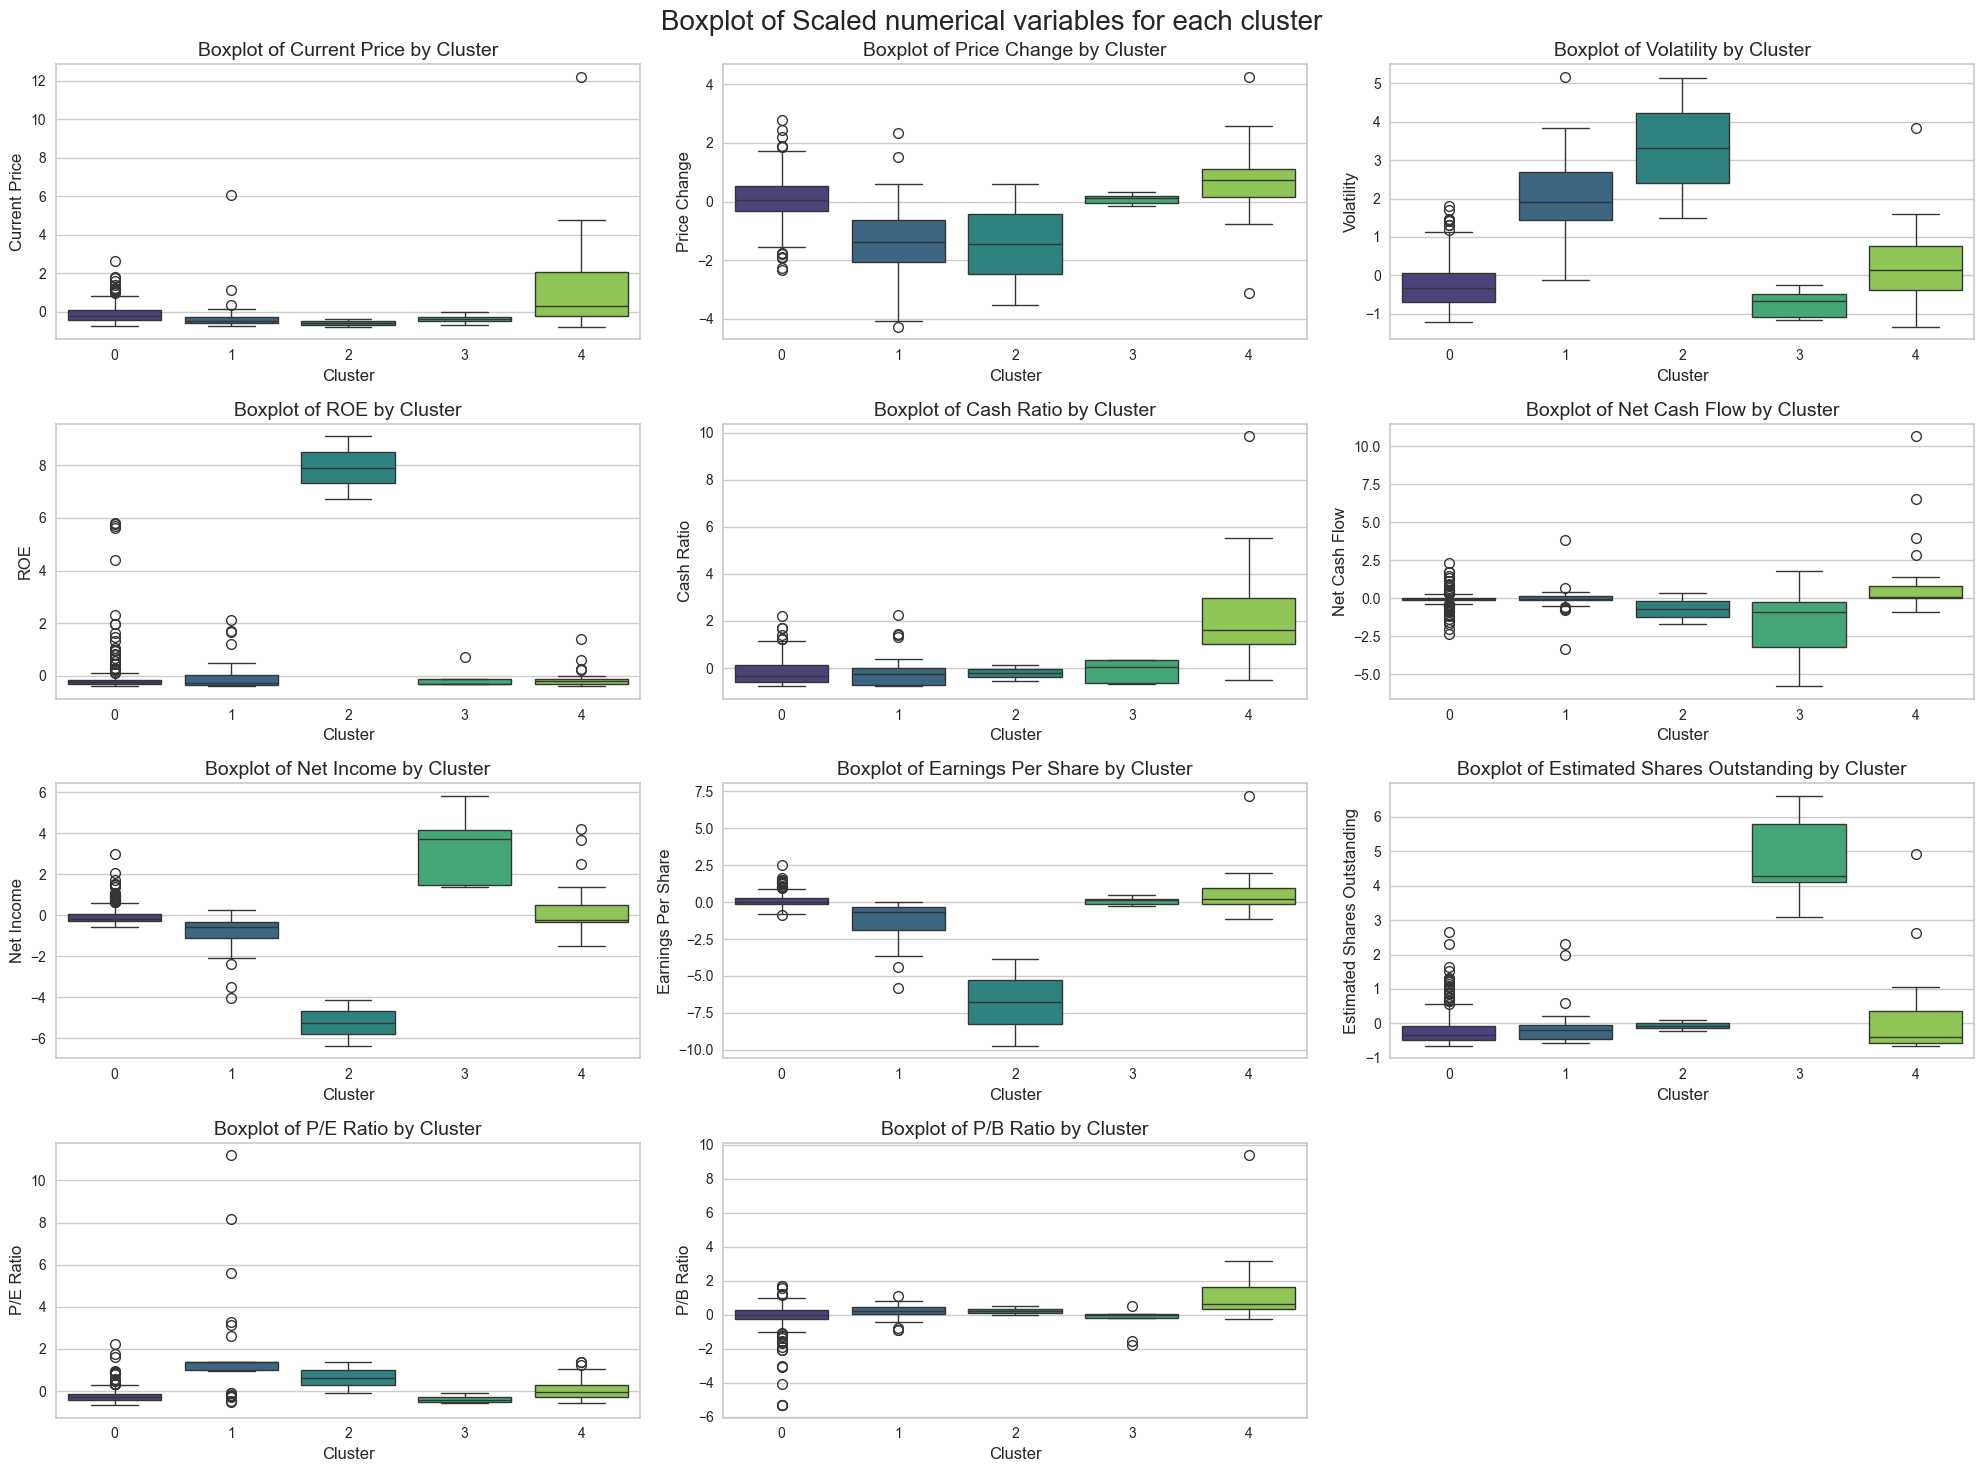

In [51]:
# Set up the size of the figure and the grid (4 rows, 3 columns)
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
fig.suptitle("Boxplot of Scaled numerical variables for each cluster", fontsize=20)

# Flatten the axes array for easier indexing in the loop
axes = axes.flatten()

# Loop through each numerical column and create a boxplot
for i, column in enumerate(num_cols):
    sns.boxplot(
        x="KM_segments", y=column, data=subset_scaled_df, ax=axes[i], palette="viridis"
    )
    axes[i].set_title(f"Boxplot of {column} by Cluster", fontsize=14)
    axes[i].set_xlabel("Cluster", fontsize=12)
    axes[i].set_ylabel(column, fontsize=12)

# Remove any empty subplots if the number of features is less than 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()


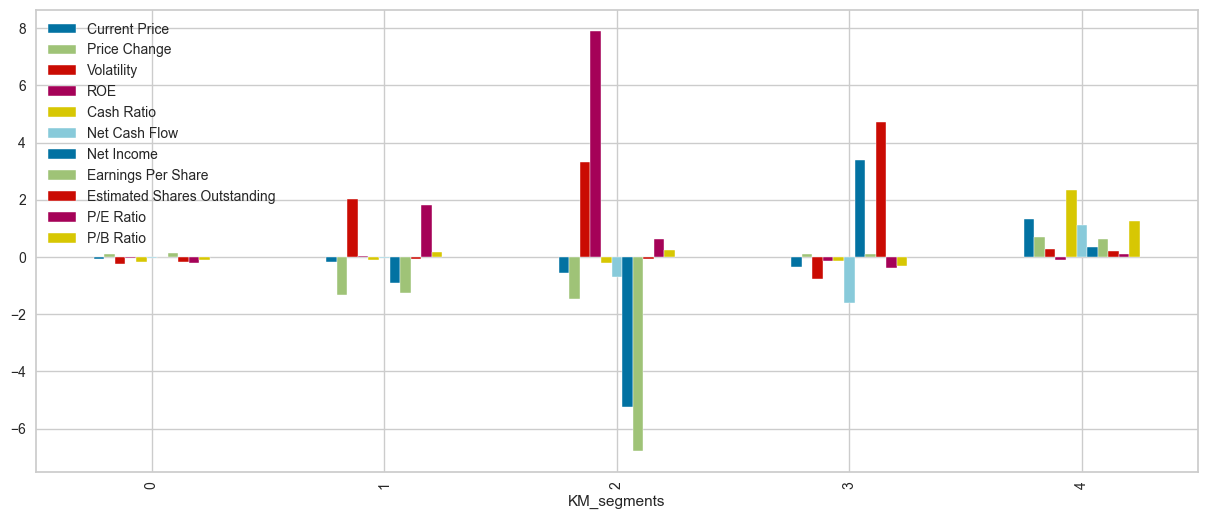

In [52]:
subset_scaled_df.groupby("KM_segments").mean(numeric_only=True).plot.bar(
    figsize=(15, 6)
)
plt.show()


## <a id='toc1_8_'></a>[Hierarchical Clustering](#toc0_)


In [53]:
df_hc = subset_scaled_df.copy()


### <a id='toc1_8_1_'></a>[Checking Cophenetic Correlation](#toc0_)


In [54]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.9381866862278843.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8741250189456776.
Cophenetic correlation for Euclidean distance and average linkage is 0.9501078999418133.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8950437139160046.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9327825401743682.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8238581136070481.
Cophenetic correlation for Chebyshev distance and average linkage is 0.941660816516849.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8974299860845545.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9375736709363668.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.8440553871479908.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9405496499144259.
Cophenetic cor

In [55]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.9501078999418133, which is obtained with Euclidean distance and average linkage.


### <a id='toc1_8_2_'></a>[Linkage Methods with Euclidean Distance](#toc0_)


In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm


Cophenetic correlation for single linkage is 0.9381866862278843.
Cophenetic correlation for complete linkage is 0.8741250189456776.
Cophenetic correlation for average linkage is 0.9501078999418133.
Cophenetic correlation for centroid linkage is 0.9488456422293653.
Cophenetic correlation for ward linkage is 0.7796428374975963.
Cophenetic correlation for weighted linkage is 0.8950437139160046.


In [57]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)


Highest cophenetic correlation is 0.9501078999418133, which is obtained with average linkage.


**The cophenetic correlation is the maximum (0.95) with Average linkage.**


### <a id='toc1_8_3_'></a>[Visualizing Dendrograms](#toc0_)


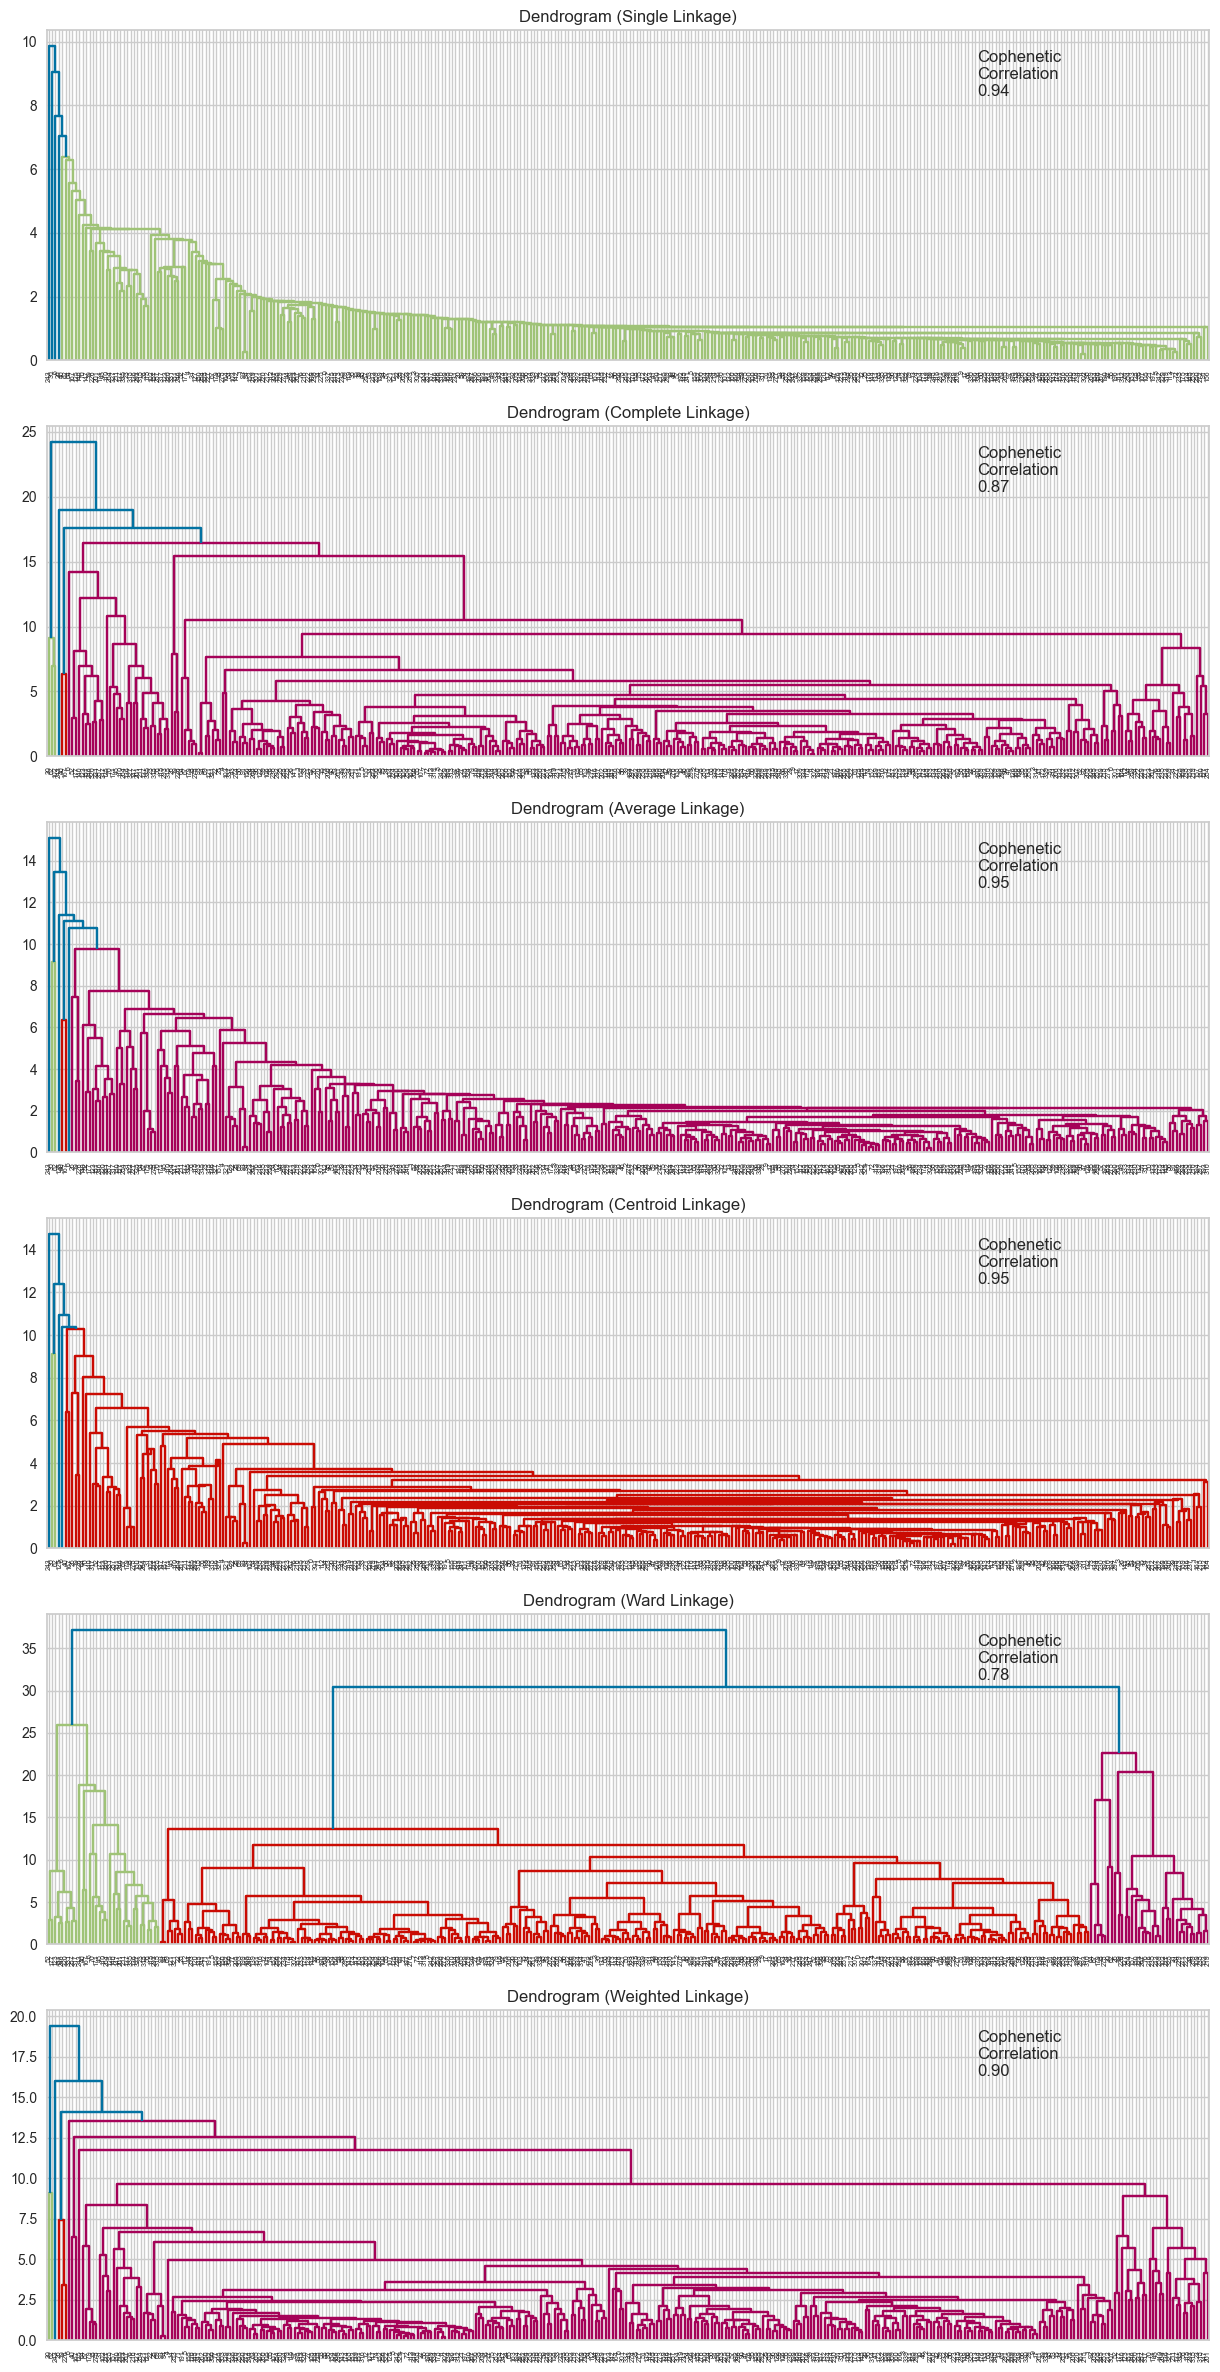

In [58]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
plt.show()

compare.append([method, coph_corr])


**Observations:**
- Although Average linkage has the highest cophenetic correlation, it is not the best choice for visualization.
- It rather seems that the **single linkage** is the best choice.

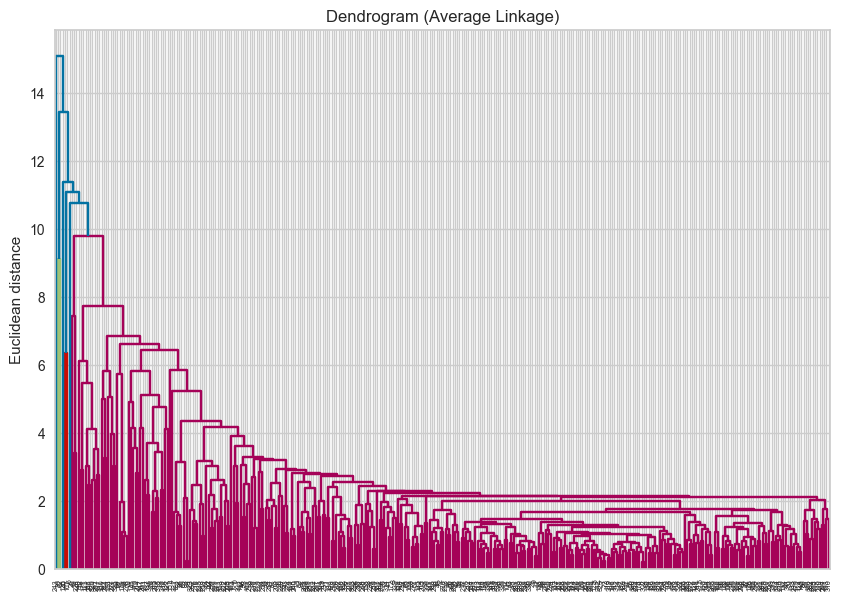

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# Perform the linkage computation once using the 'average' method
Z = linkage(df_hc, method="average", metric="euclidean")

# Plot the dendrogram for visualization
plt.figure(figsize=(10, 7))
dendro = dendrogram(Z)
plt.title("Dendrogram (Average Linkage)")
plt.ylabel("Euclidean distance")
plt.show()


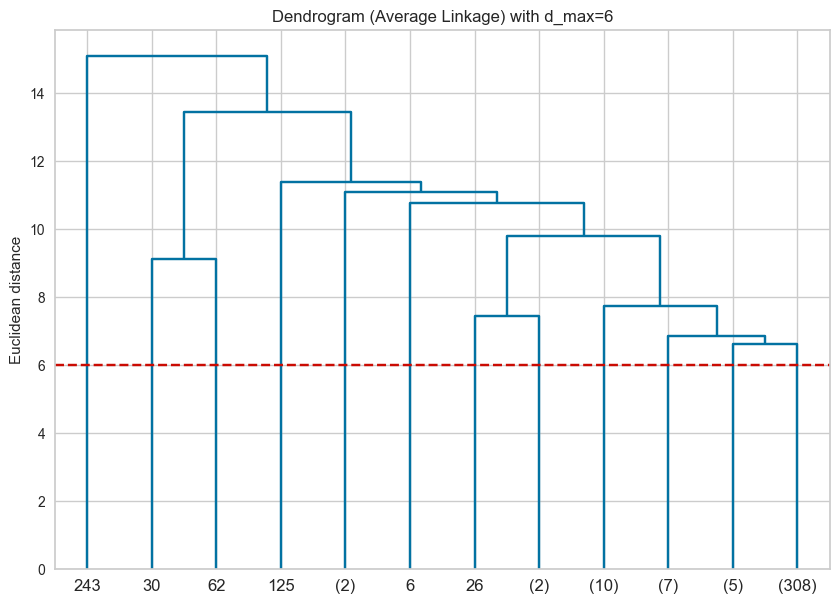

Clusters for d_max=6:
Cluster_dmax_6
12    290
11     18
7       9
9       7
10      5
5       2
13      1
6       1
1       1
3       1
2       1
14      1
8       1
4       1
15      1
Name: count, dtype: int64


In [60]:
# Function to plot dendrogram up to a given distance
def plot_dendrogram_cut(Z, d_max, title):
    plt.figure(figsize=(10, 7))
    dendro = dendrogram(
        Z, color_threshold=d_max, truncate_mode="lastp", p=12
    )  # Truncate mode only shows up to last 12 clusters
    plt.axhline(
        y=d_max, color="r", linestyle="--"
    )  # Add a red dashed line for the cutoff at d_max
    plt.title(f"{title} with d_max={d_max}")
    plt.ylabel("Euclidean distance")
    plt.show()


# Plot the dendrogram up to max distance d_max=6
plot_dendrogram_cut(Z, 6, "Dendrogram (Average Linkage)")

# Cut the dendrogram for d_max=6 and display clusters
max_d_6 = 6
clusters_6 = fcluster(Z, max_d_6, criterion="distance")
df_hc["Cluster_dmax_6"] = clusters_6
print("Clusters for d_max=6:")
print(df_hc["Cluster_dmax_6"].value_counts())


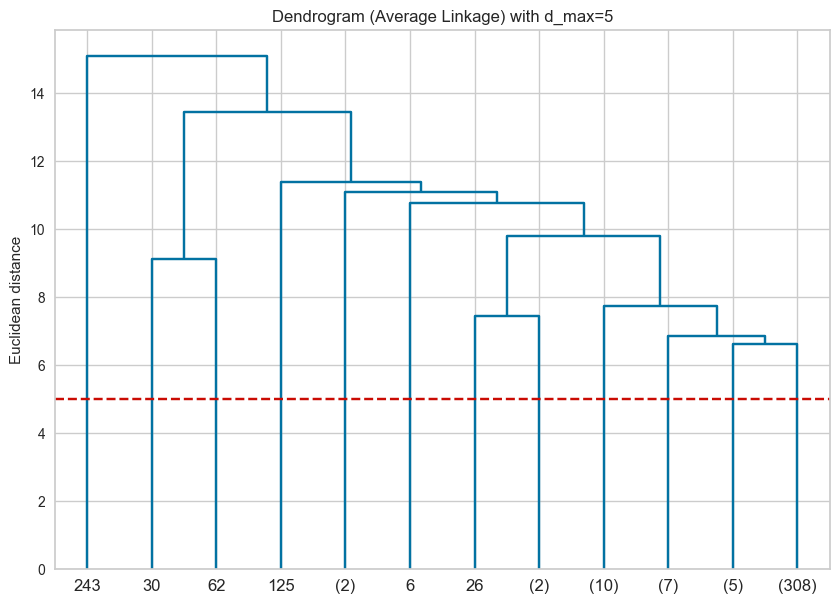

Clusters for d_max=5:
Cluster_dmax_5
18    288
17     11
8       7
15      5
13      4
10      3
11      3
16      2
7       2
5       2
3       1
12      1
19      1
2       1
14      1
1       1
6       1
22      1
9       1
21      1
20      1
4       1
23      1
Name: count, dtype: int64


In [61]:
# Plot the dendrogram up to max distance d_max=5
plot_dendrogram_cut(Z, 5, "Dendrogram (Average Linkage)")

# Cut the dendrogram for d_max=5 and display clusters
max_d_5 = 5
clusters_5 = fcluster(Z, max_d_5, criterion="distance")
df_hc["Cluster_dmax_5"] = clusters_5
print("Clusters for d_max=5:")
print(df_hc["Cluster_dmax_5"].value_counts())


**The most ideal number of clusters is 6**
- These clusters are well-separated, with most merges happening at higher distances, indicating distinct groupings. 
- The large vertical jumps, especially the ones above 10, suggest that clusters merged before this point are significantly different from each other.

In [62]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc


Linkage  Cophenetic Coefficient
0  weighted                   0.895

### <a id='toc1_8_4_'></a>[Creating Model using Sklearn](#toc0_)

In [63]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="average")
HCmodel.fit(df_hc)


AgglomerativeClustering(linkage='average', n_clusters=5)

In [64]:
# creating a copy of the original data
df2 = df1.copy()


In [65]:
df_hc["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_


### <a id='toc1_9_'></a>[Cluster Profiling](#toc0_)

In [66]:
numeric_df2 = df2.select_dtypes(include=[np.number])

hc_cluster_profile = numeric_df2.groupby(df2["HC_Clusters"]).mean()


In [67]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_Clusters")["Company"].count().values
)


In [ ]:
hc_cluster_profile.style.highlight_max(color="green", axis=0)


In [69]:
# let's see the names of the Companies in each cluster
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Company"].unique())
    print()


In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myer

In [70]:
df2.groupby(["HC_Clusters", "GICS Sector"])["Company"].count()


HC_Clusters  GICS Sector                
0            Consumer Discretionary         37
             Consumer Staples               18
             Energy                         27
             Financials                     45
             Health Care                    37
             Industrials                    53
             Information Technology         31
             Materials                      20
             Real Estate                    27
             Telecommunications Services     3
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          1
3            Energy                          2
4            Consum

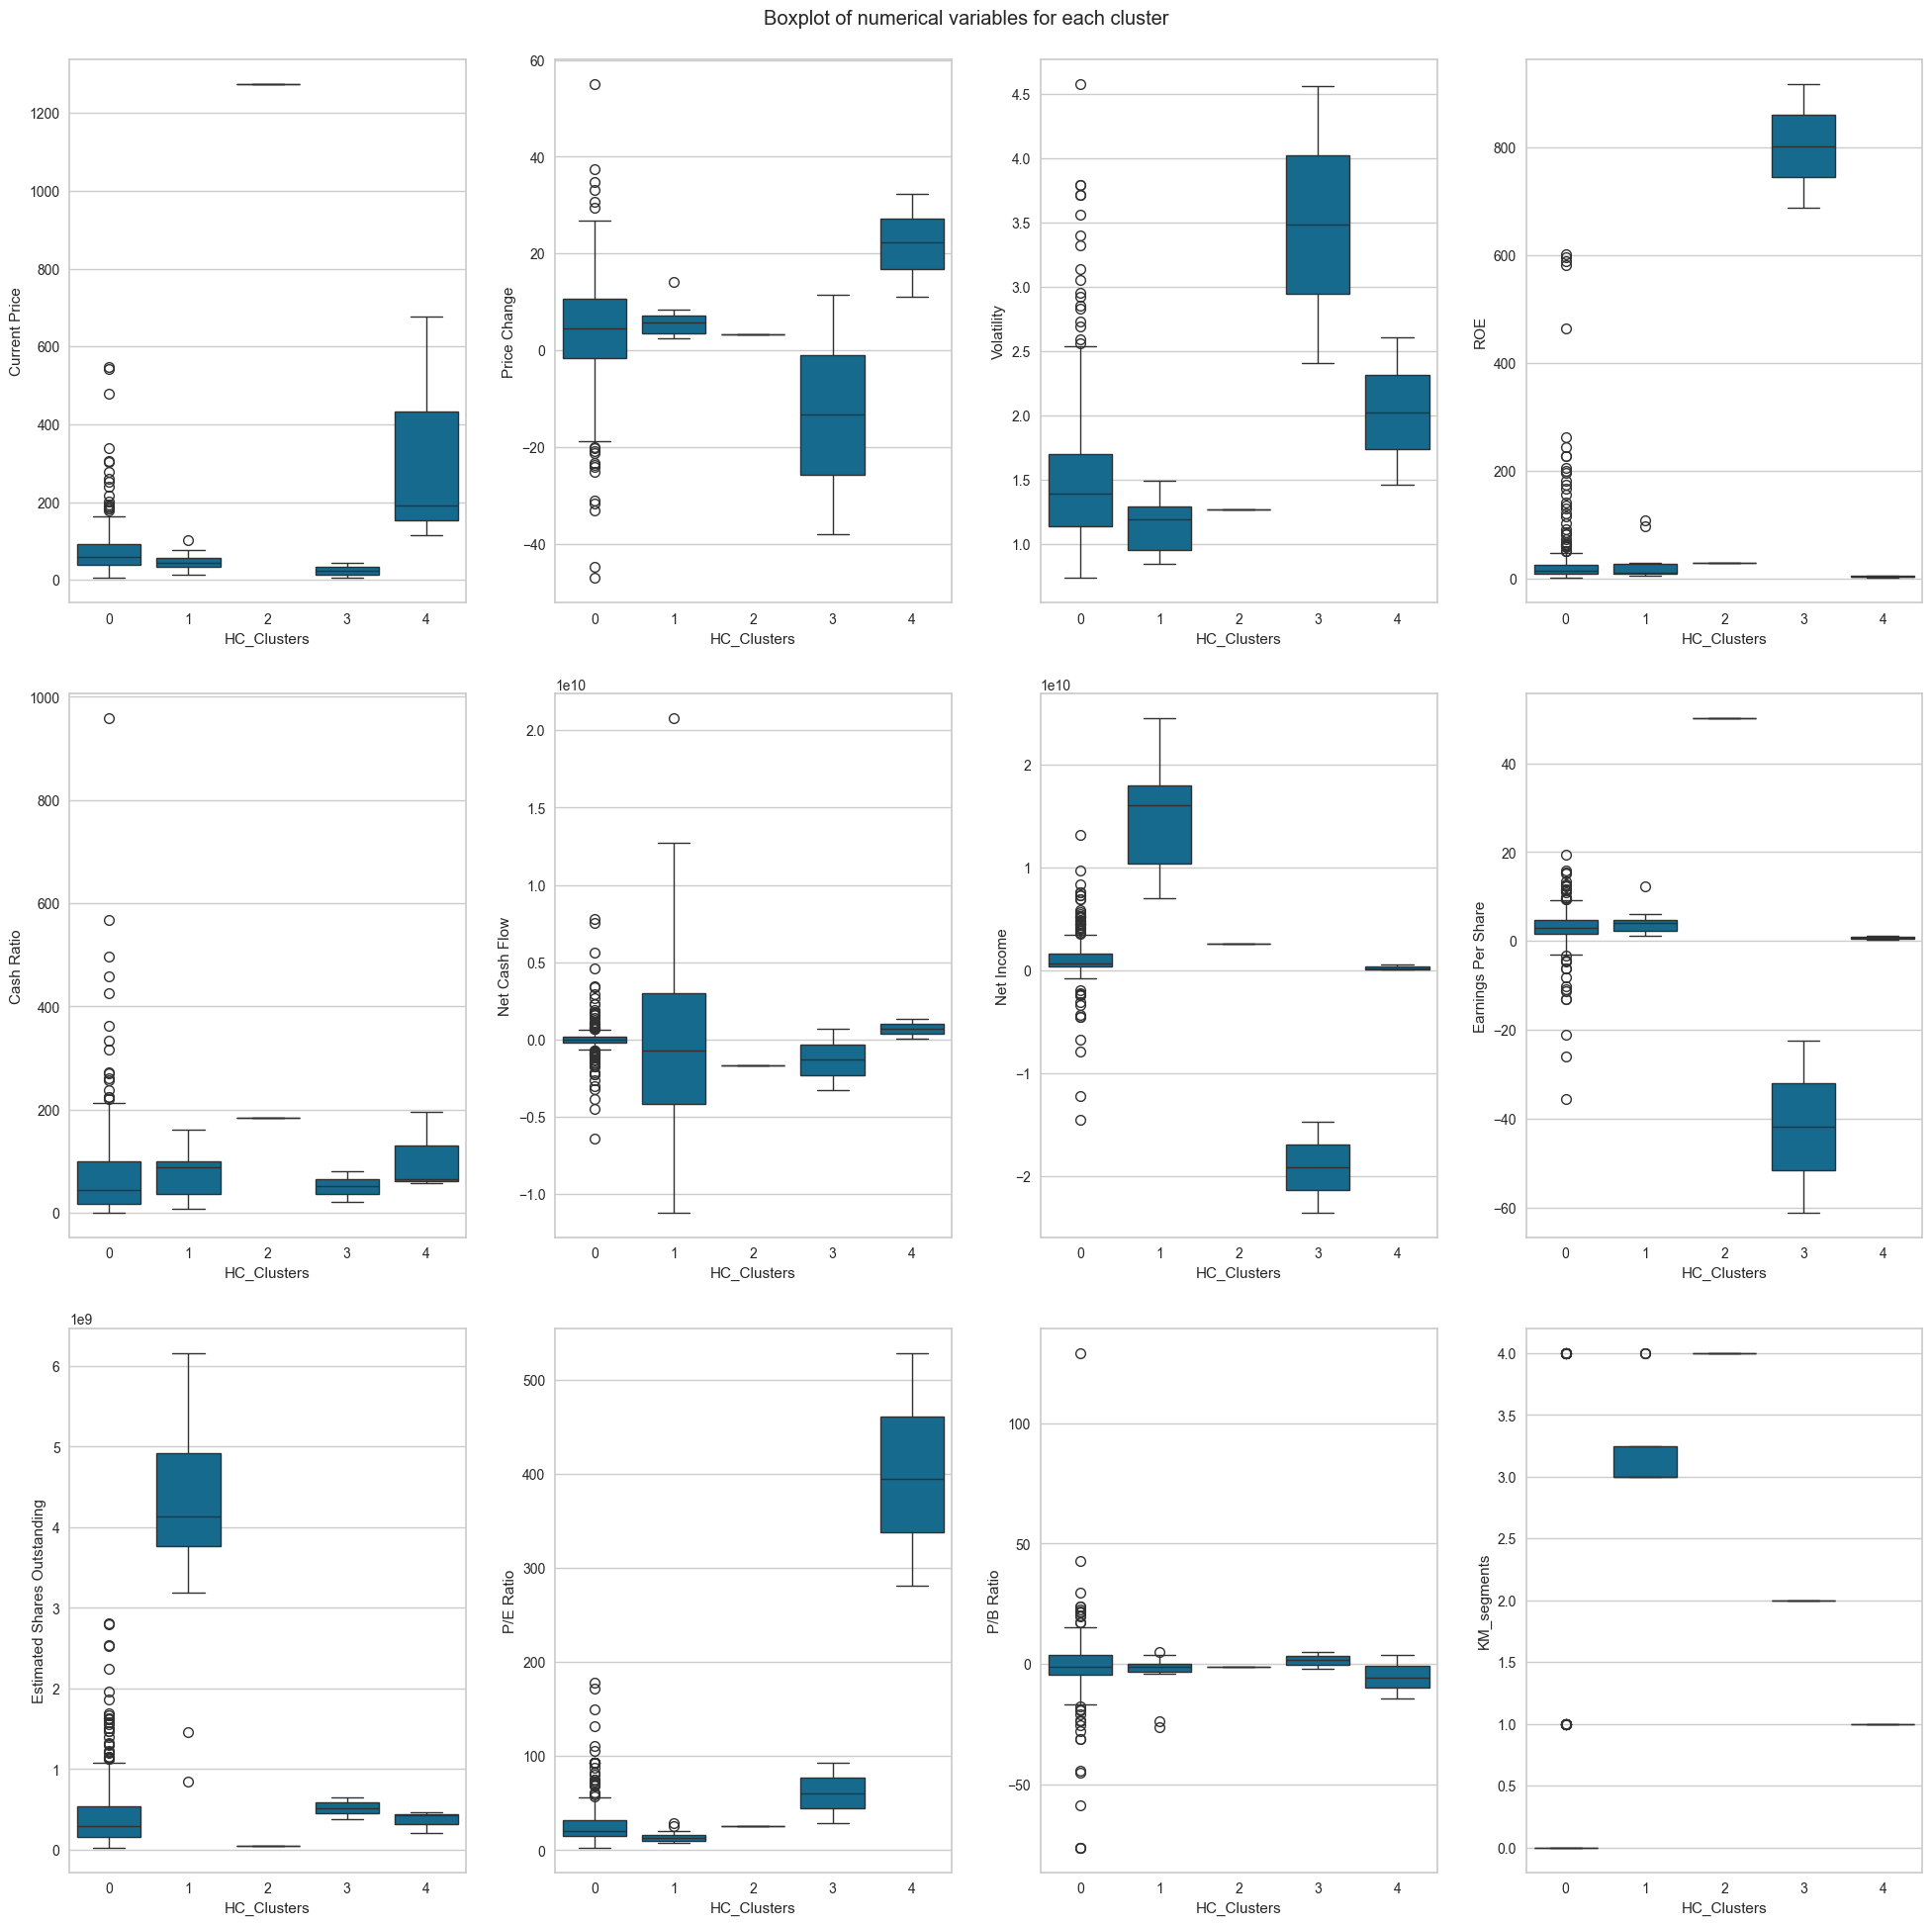

In [71]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)
plt.show()


## <a id='toc1_10_'></a>[K-means vs Hierarchical Clustering](#toc0_)


You compare several things, like:

- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.


### <a id='toc1_10_1_'></a>[Execution time](#toc0_)

In [72]:
import time

# Measure time for KMeans
start_time_kmeans = time.time()
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(subset_scaled_df)
end_time_kmeans = time.time()
execution_time_kmeans = end_time_kmeans - start_time_kmeans

# Measure time for Hierarchical Clustering
start_time_hc = time.time()
Z = linkage(subset_scaled_df, method="average", metric="euclidean")
clusters_hc = fcluster(
    Z, 5, criterion="maxclust"
)  # Assuming you're using 5 clusters here for consistency
end_time_hc = time.time()
execution_time_hc = end_time_hc - start_time_hc

print(f"KMeans Execution Time: {execution_time_kmeans:.4f} seconds")
print(f"Hierarchical Clustering Execution Time: {execution_time_hc:.4f} seconds")


KMeans Execution Time: 0.0030 seconds
Hierarchical Clustering Execution Time: 0.0030 seconds


**Hierarchical Clustering was slightly faster in this instance. However, the difference is minimal, and both techniques executed very quickly on this dataset.**


### <a id='toc1_10_2_'></a>[Number of Distinct Clusters](#toc0_)

- Comparing both techniques, we can see that K-means has more distinct clusters than Hierarchical Clustering.
- It also has a more balanced cluster separation and distribution. 

### <a id='toc1_10_3_'></a>[Number of Similar Observations between K-means and Hierarchical Clustering](#toc0_)

In [73]:
# Count the number of observations where KM_segments and HC_Clusters agree (same cluster)
similar_clusters = (df1["KM_segments"] == df2["HC_Clusters"]).sum()

# Total number of observations
total_observations = df1.shape[0]

print(
    f"{similar_clusters} observations fall into the same clusters in both algorithms."
)
print(
    f"This represents {(similar_clusters / total_observations) * 100:.2f}% of the total observations."
)


275 observations fall into the same clusters in both algorithms.
This represents 80.88% of the total observations.


### <a id='toc1_10_4_'></a>[Most Optimal Number of Clusters](#toc0_)

In [74]:
# Number of optimal clusters in KMeans
distinct_kmeans_clusters = df1["KM_segments"].nunique()

# Number of optimal clusters in Hierarchical Clustering
distinct_hc_clusters = df2["HC_Clusters"].nunique()

print(f"KMeans formed {distinct_kmeans_clusters} distinct clusters.")
print(f"Hierarchical Clustering formed {distinct_hc_clusters} distinct clusters.")


KMeans formed 5 distinct clusters.
Hierarchical Clustering formed 5 distinct clusters.


**K-means**

- After K-Elbow method, the optimal number of clusters found was 5.
- 5 was chosen since it had a Higher Average Silhouette Score, good cluster separation, and balanced clustering.

**Hierarchical Clustering**

- The most optimal number of clusters found for Hierarchical Clustering was 5 as well. 
- This was due to having a good balance on the vertical jumps in the dendrogram after analysis. 



**Final comparison between both clustering profiles:**

In [75]:
km_cluster_profile.style.highlight_max(color="green", axis=0)


In [76]:
hc_cluster_profile.style.highlight_max(color="green", axis=0)


Although, 80.88% of the total observations indicate a significant overlap between the clustering results, there are some differences in how the two methods group observations.

**Cluster 0:**
- KMeans: Cluster 0 is defined by a moderate Current Price (72.73) and moderate P/E Ratio (23.68), with a negative P/B Ratio (-3.39).
- HC: Cluster 0 in HC has similar Current Price (76.45) and P/E Ratio (29.69), but a less negative P/B Ratio (-1.61). It also has a higher Cash Ratio and Net Cash Flow.

**Cluster 1:**
- KMeans: Cluster 1 shows a negative Price Change (-11.88), a high P/E Ratio (113.49), and a negative Net Income (-2.1 billion).
- HC: In contrast, HC Cluster 1 has a much lower P/E Ratio (14.65) and shows a positive Net Income (14.92 billion). This shows a significant difference between both clustering techniques for this segment.

**Cluster 2:**
- This small cluster in both methods contains companies with a very low Price Change and very high ROE (802), along with a negative Net Cash Flow and Net Income.
- Both algorithms identify this extreme cluster similarly, though HC Cluster 2 has one additional observation.

**Cluster 3:**
- This cluster has very similar profiles in both methods, with negative Price Change (-13.35), high Volatility, and extremely negative Net Income. 
- It appears both clustering methods identified this cluster accurately and consistently.

**Cluster 4:**
- KMeans: Cluster 4 has a very high Current Price (211.16) and a high Cash Ratio (280.25), along with a high P/E Ratio (37.89).
- HC: Cluster 4 has a much higher Current Price (327.00), a very high P/E Ratio (400.98), and a lower ROE (4.00).


## <a id='toc1_11_'></a>[Actionable Insights and Recommendations](#toc0_)

Trade&Ahead has tasked us with analyzing stock data from companies listed in the NYSE to identify clusters of stocks with similar characteristics, which can guide personalized investment strategies. Through KMeans and Hierarchical Clustering, we identified distinct stock clusters, each with its unique profile. Based on our analysis of financial metrics, such as stock price, price volatility, and P/E ratios, we recommend a diversified investment strategy, emphasizing growth in the Energy sector while balancing risk with investments in Information Technology and Telecommunication Services.

### <a id='toc1_11_1_'></a>[Identifying Low-Risk, Stable Stocks (Cluster 0):](#toc0_)

**Characteristics:**
- Average current price of $72.74.
- Volatility is relatively low at 1.38, indicating stability in stock price movements.
- Positive ROE of 34.83%, showing that these companies are efficient at generating profit from shareholders' equity.
- Cash ratio of 53.14%, indicating strong liquidity.
- Although net cash flow is negative (-$10.15M), net income is positive ($1.49B), showing overall profitability.

**Business Insight:** 
- This cluster contains stable, relatively low-risk companies with good financial performance and low price volatility. They are suitable for risk-averse investors looking for long-term value and capital preservation.

**Recommendation:**
- Advise clients seeking low-risk, stable returns to include stocks from this cluster in their portfolios.
These stocks can act as defensive positions during market volatility, helping to preserve wealth while offering consistent performance.

### <a id='toc1_11_2_'></a>[High-Volatility, High-Risk Stocks (Cluster 2):](#toc0_)

**Characteristics:**
- Very low current price ($24.49).
- High volatility at 3.48, signaling large fluctuations in stock price.
- ROE is extraordinarily high at 802%, which could indicate unusual or speculative financial behavior.
- Negative net cash flow (-$1.29B) and net income (-$19.1B) indicate significant financial distress.
- Negative earnings per share (-$41.81) and a relatively high P/E ratio (60.75) suggest that these companies may be overvalued.

**Business Insight:** 
- This cluster represents high-risk, speculative stocks with substantial volatility. These companies are likely under financial stress, with significant negative income and cash flow.

**Recommendation:**
- These stocks are suited for high-risk, high-reward investors who are willing to accept significant short-term volatility for the potential of a large payoff.
- Warn clients that investing in this cluster comes with a high probability of losses, and it should make up only a small portion of a diversified portfolio.

### <a id='toc1_11_3_'></a>[Growth Stocks with Positive Financial Momentum (Cluster 4):](#toc0_)

**Characteristics:**
- High current price ($211.16).
- Moderate volatility (1.70), which is manageable.
- Healthy ROE of 30.71%, indicating good profitability.
- Strong cash ratio (280.25%), suggesting these companies have a solid liquidity position.
- Positive net cash flow ($2.19B) and net income ($2.81B), reflecting strong operational performance.
- Positive earnings per share ($6.82) and high P/B ratio (15.68), suggesting growth potential but possibly high market valuation.

**Business Insight:**
- These are growth-oriented stocks with strong liquidity, profitability, and moderate volatility, making them ideal for growth investors looking for medium to long-term capital appreciation.

**Recommendation:**
- Recommend this cluster to clients seeking growth stocks to capitalize on potential market gains.
These companies offer strong fundamentals but should be monitored for potential overvaluation risks due to high P/B ratios.

### <a id='toc1_11_4_'></a>[High Liquidity, Mid-Volatility Stocks (Cluster 1):](#toc0_)

**Characteristics:**
- Lower current price ($65.11).
- Higher volatility (2.72), indicating more risk than Cluster 0.
- ROE of 44%, showing strong returns to shareholders.
- Cash ratio of 61.40%, indicating good liquidity.
- Negative net income (-$2.14B) and net cash flow (-$36.86M), which may be a concern despite a high ROE.

**Business Insight:** 
- This cluster has high-liquidity stocks with potential growth but increased volatility and some financial instability (negative income). These stocks may offer higher returns but carry more risk.

**Recommendation:**
- Suitable for investors who can tolerate moderate risk and are looking for liquidity and potentially high returns.
- Monitor financial health closely, especially negative cash flows, to avoid high-risk exposure.

### <a id='toc1_11_5_'></a>[Small, Volatile Companies (Cluster 3):](#toc0_)
**Characteristics:**
- Moderate current price ($46.67).
- Low volatility (1.08), but a low number of observations in this cluster (9 companies), indicating these may be niche or small-cap companies.
- ROE of 25% and a positive cash ratio of 58.33%.
- Mixed financial health: net cash flow is negative (-$3.04B), but net income is highly positive ($14.85B).

**Business Insight:** 
- These are smaller, more volatile companies with moderate profitability and mixed financial stability. They could be part of specific niche industries.

**Recommendation:**
- Investors looking for exposure to niche markets may find opportunities here, but caution is needed due to mixed financial signals.
- Suggest allocating a small portion of the portfolio to these companies and monitor performance closely.

### <a id='toc1_11_6_'></a>[Recommendations for Portfolio Diversification:](#toc0_)
- Low-risk allocation: Include Cluster 0 stocks (low volatility, stable growth) for stability and preservation of capital.
- Growth-oriented allocation: Include Cluster 4 stocks for potential capital appreciation but keep an eye on market valuations.
- High-risk, high-reward allocation: Include a small portion of Cluster 2 stocks (high volatility) for speculative opportunities but warn of the risk of loss.
- Diversified exposure: Include a mix of Cluster 1 and Cluster 3 stocks for balanced exposure to liquidity and niche markets.

### <a id='toc1_11_7_'></a>[Final Business Recommendations:](#toc0_)
- Create personalized portfolio strategies based on client risk tolerance and investment goals, balancing exposure to growth, stability, and speculative stocks.
- Emphasize diversification across clusters to protect against volatility and market downturns.
- Monitor high-volatility stocks closely and adjust the portfolio as needed to maintain desired risk levels.
- Use the clustering insights to provide tailored advice to clients, helping them make informed decisions based on data-driven analysis.